<img src="https://d1yjjnpx0p53s8.cloudfront.net/styles/logo-thumbnail/s3/102012/logo_unab.png?itok=hZ5x30O2" width="240" height="240" align="right"/>

<center><h1>Estadística para la Ciencia de Datos</header1></center>
<left><h1>Unidad 2: Procesamiento y contraste de datos</header1></left>

Presentado por: Mildred Daniela Jaramillo Vargas <br>
Fecha: 20/10/2025

## Importación de librerias necesarias

In [1]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from scipy.stats import ttest_ind
import scipy.stats as stats
import statsmodels.formula.api as smf
from scipy.stats import shapiro, pearsonr, spearmanr, levene, mannwhitneyu, f_oneway, kruskal
#warnings
import warnings
warnings.filterwarnings("ignore")

## Cargar el Dataset

In [2]:
#Código para cargar el Dataset
import kagglehub
import os
#url = 'insertar url'
path = kagglehub.dataset_download("mohsenzergani/bangladeshi-university-students-mental-health")
print("Path to dataset files:", path)
print("Contenido de la carpeta descargada:", os.listdir(path))


100%|██████████| 48.2k/48.2k [00:00<00:00, 26.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mohsenzergani/bangladeshi-university-students-mental-health/versions/1
Contenido de la carpeta descargada: ['Raw Data.csv']


In [3]:
file_path = os.path.join(path, "Raw Data.csv")
df_original = pd.read_csv(file_path)

In [4]:
df_original.columns

Index(['1. Age', '2. Gender', '3. University', '4. Department',
       '5. Academic Year', '6. Current CGPA',
       '7. Did you receive a waiver or scholarship at your university?',
       '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ',
       '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ',
       '3. In a semester, how often have you had trouble relaxing due to academic pressure? ',
       '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?',
       '5. In a semester, how often have you worried too much about academic affairs? ',
       '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?',
       '7. In a semester, how often have you felt afraid, as if something awful might happen?',
       'Anxiety Value', 'Anxiety Label',
       '1. In a semester, how often have you felt upset due

#**🌱 Factores asociados a la salud mental en la población estudiantil universitaria Bangladesh - Análisis exploratorio e inferencial**

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1D1KIM8srVZIpPN3-PxGWa-GcgU5HucD7" width="750" height="750" align="right"/>
</p>




##**Descripción del problema**</br>
En los últimos años, la salud mental de los estudiantes universitarios se ha convertido en una preocupación creciente a nivel mundial. Las exigencias académicas, la presión por mantener un buen rendimiento y la incertidumbre sobre el futuro laboral contribuyen a la aparición de síntomas de ansiedad, estrés y depresión.</br>
En el contexto de Bangladesh, como en muchos países en desarrollo, estos factores se intensifican debido a las limitadas estrategias institucionales de apoyo psicológico y las altas expectativas familiares. Ante esta situación, surge la necesidad de analizar cómo distintas características personales y académicas se relacionan con el bienestar psicológico de los estudiantes.</br>
El presente estudio busca explorar los niveles de ansiedad, estrés y depresión en una muestra de universitarios bangladesíes, así como identificar posibles diferencias según variables como género, rendimiento académico (CGPA) y tipo de beca. Este análisis permitirá comprender mejor los factores asociados al malestar psicológico y orientar futuras intervenciones de prevención y acompañamiento
##**Objetivo general**</br>
Analizar los niveles de ansiedad, estrés y depresión en estudiantes universitarios de Bangladesh, y su relación con variables sociodemográficas y académicas, a partir del análisis estadístico de un conjunto de datos recopilado en 2023.
##**Objetivos específicos**</br>
1.   Examinar la distribución de los niveles de ansiedad, estrés y depresión en la población estudiada.
2.   Comparar los puntajes de salud mental según género, edad, universidad, tipo de facultad (profesión estudiada), año académico, rendimiento (CGPA) y beca.
3.   Evaluar la relación entre las escalas de ansiedad, estrés y depresión, identificando posibles correlaciones.
4.   Aplicar pruebas de hipótesis para determinar diferencias o asociaciones significativas entre variables.


##**Variables de entrada**

Las siguiente variables son las utilizadas para estudiar su relación con los resultados de salud mental y bienestar psicológico

- Gender: Género del estudiante

- Age: Edad del estudiante

- Year_of_Study: Año académico actual (1°, 2°, 3°, 4°...)

- CGPA: Promedio acumulado (rendimiento académico)

- Scholarship_Type: Indica si el estudiante recibe una beca. Toma los valores Yes (sí recibe beca) y No (no recibe beca).

##**Variables objetivo**

Estas variables son numéricas y continuas, y constituyen el foco principal de las pruebas de hipótesis y análisis estadísticos.

Depression_Score → Nivel total de depresión (suma de ítems de la escala DASS).

Anxiety_Score → Nivel total de ansiedad (suma de ítems de ansiedad).

Stress_Score → Nivel total de estrés (suma de ítems de estrés).






## **Caracterización del Dataset**

Se incluye una descripción de los datos con:

1- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.

Las variables objetivo no tienen clases ya que son de tipo continuas.

- Depression_Score → Nivel total de depresión (suma de ítems de la escala DASS). (numérica continua)
- Anxiety_Score → Nivel total de ansiedad (suma de ítems de ansiedad). (numérica continua)
- Stress_Score → Nivel total de estrés (suma de ítems de estrés). (numérica continua)


2-  Número de instancias en total.

- El conjunto de datos contiene 1965 instancias (filas) y 14 atributos (columnas).




3-  Número de instancias pertenecientes a cada clase.


| **Variable** | **Clase** | **Cantidad** |
|---------------|------------|--------------|
| **Age** | 18–22 | 1263 |
|  | 23–26 | 671 |
|  | 27–30 | 24 |
|  | Below 18 | 4 |
|  | Above 30 | 3 |
| **Gender** | Male | 1361 |
|  | Female | 594 |
|  | Prefer not to say | 10 |
| **University** | IUB | 580 |
|  | AIUB | 522 |
|  | IUT | 277 |
|  | DU | 202 |
|  | DUET | 164 |
|  | NSU | 91 |
|  | PSTU | 36 |
|  | BUET | 32 |
|  | EWU | 19 |
|  | RUET | 13 |
|  | RU | 12 |
|  | BAU | 7 |
|  | BRAC | 6 |
|  | Daffodil | 3 |
|  | UIU | 1 |
| **Department** | CS/Computing | 1365 |
|  | Business | 129 |
|  | EEE/ECE | 127 |
|  | Biology | 95 |
|  | Other | 77 |
|  | Mechanical Eng | 68 |
|  | Civil Eng | 50 |
|  | Env & Life Sci | 47 |
|  | Engineering | 4 |
|  | Pharmacy | 1 |
|  | Law | 1 |
|  | Social Sciences | 1 |
| **Academic Year** | 1st Year | 585 |
|  | 3rd Year | 548 |
|  | 4th Year | 391 |
|  | 2nd Year | 370 |
|  | Other | 71 |
| **CGPA** | 3.0–3.39 | 568 |
|  | 3.4–3.79 | 546 |
|  | 2.5–2.99 | 368 |
|  | 3.8–4.0 | 235 |
|  | Other | 167 |
|  | < 2.5 | 81 |
| **Anxiety Level** | Severe | 713 |
|  | Moderate | 609 |
|  | Mild | 485 |
|  | Minimal | 158 |
| **Depression Level** | Mod-Severe | 494 |
|  | Severe | 487 |
|  | Moderate | 446 |
|  | Mild | 402 |
|  | Minimal | 92 |
|  | None | 44 |
| **Stress Level** | Moderate | 1305 |
|  | High | 545 |
|  | Low | 115 |



4- Número de atributos de entrada, su significado y tipo.

| **Atributo de entrada** | **Significado**                              | **Tipo de dato (Dtype)** |
| ----------------------- | -------------------------------------------- | ------------------------ |
| **Age**                 | Grupo de edad del estudiante (por rangos)    | Categórico (object)    |
| **Gender**              | Género del estudiante                        | Categórico (object)    |
| **University**          | Universidad a la que pertenece el estudiante | Categórico (object)    |
| **Department**          | Departamento o facultad del estudiante       | Categórico (object)    |
| **Academic_Year**       | Año académico que cursa el estudiante        | Categórico (object)    |
| **CGPA**                | Promedio acumulado del estudiante (en rango) | Categórico (object)    |
| **Scholarship**         | Indica si el estudiante tiene beca o no      | Categórico (object)    |



5- ¿Hay algún valor de atributo desconocido?

| **Atributo**      | **Valores nulos (count)** |
| ---------------- | ------------------------- |
| Age              | 0                         |
| Gender           | 0                         |
| University       | 0                         |
| Department       | 0                         |
| Academic_Year    | 0                         |
| CGPA             | 0                         |
| Scholarship      | 0                         |
| Anxiety_Score    | 0                         |
| Anxiety_Level    | 0                         |
| Stress_Score     | 0                         |
| Stress_Level     | 0                         |
| Depression_Score | 0                         |
| Depression_Level | 0                         |


El análisis de los datos indicó que todas las columnas del dataset están completas, sin valores faltantes.



#**1- Limpieza de datos**

In [5]:
df_original.head()

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?","2. In a semester, how often have you been unable to stop worrying about your academic affairs?","3. In a semester, how often have you had trouble relaxing due to academic pressure?",...,"2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?","7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?","8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?","9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression


In [6]:
#Hacer copia del dataset original
df = df_original.copy()

In [7]:
#Número de instancias totales
df.shape

(1977, 39)

Durante la revisión inicial del conjunto de datos “Bangladeshi University Students Mental Health”, se identificó que los nombres de las variables presentaban numeración al inicio (por ejemplo, 1. Age", "2. Gender", '3. University), lo cual dificultaba la manipulación y el análisis en Python.
Por esta razón, se procedió a renombrar las variables eliminando la numeración y reemplazando los espacios con guiones bajos (por ejemplo, Age, Gender, CGPA, Academic_Year, Scholarship).</br>
Asimismo, el dataset incluía una serie de columnas correspondientes a las preguntas individuales de las escalas de ansiedad, depresión y estrés (DASS-21). Dado que el propio archivo contiene tres columnas adicionales (Anxiety_Value, Depression_Value y Stress_Value) que representan la suma total de los ítems de cada escala, se decidió eliminar las columnas de preguntas individuales y conservar únicamente los valores totales.</br>
Esta decisión se justifica en que dichas columnas resumen de manera adecuada la intensidad de cada variable psicológica, evitando redundancia y facilitando el análisis estadístico posterior.

In [8]:
#Filtrar las variables que usaremos para nuestro caso de estudio
df = df[["1. Age", "2. Gender", '3. University', '4. Department',
       '5. Academic Year', '6. Current CGPA','7. Did you receive a waiver or scholarship at your university?',
         'Anxiety Value', 'Anxiety Label','Stress Value', 'Stress Label',
         'Depression Value', 'Depression Label']]

In [9]:
# Cambiar los nombres de las columnas
df = df.rename(columns={
    "1. Age": "Age",
    "2. Gender": "Gender",
    "3. University": "University",
    "4. Department": "Department",
    "5. Academic Year": "Academic_Year",
    "6. Current CGPA": "CGPA",
    "7. Did you receive a waiver or scholarship at your university?": "Scholarship",
    "Anxiety Value": "Anxiety_Score",
    "Anxiety Label": "Anxiety_Level",
    "Stress Value": "Stress_Score",
    "Stress Label": "Stress_Level",
    "Depression Value": "Depression_Score",
    "Depression Label": "Depression_Level"})

In [10]:
#Renombrar categorías largas para hacerlos más legible en los gráficos
#Universidades
df["University"] = df["University"].replace({
    "Independent University, Bangladesh (IUB)": "IUB",
    "American International University Bangladesh (AIUB)": "AIUB",
    "Islamic University of Technology (IUT)": "IUT",
    "Dhaka University (DU)": "DU",
    "Dhaka University of Engineering and Technology (DUET)": "DUET",
    "North South University (NSU)": "NSU",
    "Patuakhali Science and Technology University": "PSTU",
    "Bangladesh University of Engineering and Technology (BUET)": "BUET",
    "East West University (EWU)": "EWU",
    "Rajshahi University of Engineering and Technology (RUET)": "RUET",
    "Rajshahi University (RU)": "RU",
    "Bangladesh Agricultural University (BAU)": "BAU",
    "BRAC University": "BRAC",
    "Daffodil University": "Daffodil",
    "United International University (UIU)": "UIU"})

#Departamentos
df["Department"] = df["Department"].replace({
    "Engineering - CS / CSE / CSC / Similar to CS": "CS/Computing",
    "Engineering - EEE/ ECE / Similar to EEE": "EEE/ECE",
    "Engineering - Mechanical Engineering / Similar to ME": "Mechanical Eng",
    "Engineering - Civil Engineering / Similar to CE": "Civil Eng",
    "Business and Entrepreneurship Studies": "Business",
    "Environmental and Life Sciences": "Env & Life Sci",
    "Biological Sciences": "Biology",
    "Pharmacy and Public Health": "Pharmacy",
    "Liberal Arts and Social Sciences": "Social Sciences",
    "Law and Human Rights": "Law",
    "Engineering - Other": "Engineering"})

#CGPA
df["CGPA"] = df["CGPA"].replace({
    "3.00 - 3.39": "3.0–3.39",
    "3.40 - 3.79": "3.4–3.79",
    "3.80 - 4.00": "3.8–4.0",
    "2.50 - 2.99": "2.5–2.99",
    "Below 2.50": "<2.5"})

#Año académico
df["Academic_Year"] = df["Academic_Year"].replace({
    "First Year or Equivalent": "1st Year",
    "Second Year or Equivalent": "2nd Year",
    "Third Year or Equivalent": "3rd Year",
    "Fourth Year or Equivalent": "4th Year"})

In [11]:
#Renombrar niveles de ansiedad, estrés y depresión

#Anxiety_Level
df["Anxiety_Level"] = df["Anxiety_Level"].replace({
    "Severe Anxiety": "Severe",
    "Moderate Anxiety": "Moderate",
    "Mild Anxiety": "Mild",
    "Minimal Anxiety": "Minimal"})

#Stress_Level
df["Stress_Level"] = df["Stress_Level"].replace({
    "High Perceived Stress": "High",
    "Moderate Stress": "Moderate",
    "Low Stress": "Low"})

#Depression_Level
df["Depression_Level"] = df["Depression_Level"].replace({
    "Severe Depression": "Severe",
    "Moderately Severe Depression": "Mod-Severe",
    "Moderate Depression": "Moderate",
    "Mild Depression": "Mild",
    "Minimal Depression": "Minimal",
    "No Depression": "None"})

In [12]:
# Visualizar primeras filas del df
df.head()

,Age,Gender,University,Department,Academic_Year,CGPA,Scholarship,Anxiety_Score,Anxiety_Level,Stress_Score,Stress_Level,Depression_Score,Depression_Level
0,18-22,Female,IUB,CS/Computing,4th Year,2.5–2.99,No,10,Moderate,21,Moderate,11,Moderate
1,18-22,Male,IUB,CS/Computing,1st Year,3.8–4.0,No,9,Mild,18,Moderate,9,Mild
2,18-22,Male,IUB,CS/Computing,1st Year,3.0–3.39,No,10,Moderate,23,Moderate,16,Mod-Severe
3,18-22,Male,IUB,CS/Computing,1st Year,3.4–3.79,No,8,Mild,20,Moderate,9,Mild
4,18-22,Male,IUB,CS/Computing,1st Year,3.4–3.79,No,7,Mild,20,Moderate,9,Mild


In [13]:
#Verificar instancias y atributos
df.shape

(1977, 13)

In [14]:
#verificar categoría en la columna Age
df['Age'].unique()

array(['18-22', '23-26', 'Below 18', '27-30', 'Above 30'], dtype=object)

In [15]:
#verificar categoría en la columna Gender
df['Gender'].unique()

array(['Female', 'Male', 'Prefer not to say'], dtype=object)

In [16]:
#verificar  categorías en la columna University
df['University'].unique()

array(['IUB', 'Daffodil', 'BUET', 'BRAC', 'DU', 'NSU', 'AIUB', 'DUET',
       'RU', 'IUT', 'UIU', 'PSTU', 'RUET', 'EWU', 'BAU'], dtype=object)

In [17]:
#verificar  categorías en la columna Department
df['Department'].unique()

array(['CS/Computing', 'Other', 'EEE/ECE', 'Env & Life Sci', 'Business',
       'Pharmacy', 'Biology', 'Civil Eng', 'Mechanical Eng',
       'Engineering', 'Law', 'Social Sciences'], dtype=object)

In [18]:
#verificar  categorías en la columna Academic_year
df['Academic_Year'].unique()

array(['4th Year', '1st Year', '3rd Year', '2nd Year', 'Other'],
      dtype=object)

In [19]:
#Tipo de datos de las variables
df.dtypes

,0
Age,object
Gender,object
University,object
Department,object
Academic_Year,object
CGPA,object
Scholarship,object
Anxiety_Score,int64
Anxiety_Level,object
Stress_Score,int64


In [20]:
#Información de mi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1977 non-null   object
 1   Gender            1977 non-null   object
 2   University        1977 non-null   object
 3   Department        1977 non-null   object
 4   Academic_Year     1977 non-null   object
 5   CGPA              1977 non-null   object
 6   Scholarship       1977 non-null   object
 7   Anxiety_Score     1977 non-null   int64 
 8   Anxiety_Level     1977 non-null   object
 9   Stress_Score      1977 non-null   int64 
 10  Stress_Level      1977 non-null   object
 11  Depression_Score  1977 non-null   int64 
 12  Depression_Level  1977 non-null   object
dtypes: int64(3), object(10)
memory usage: 200.9+ KB


In [21]:
#Valores faltantes en el dataset
df.isna().sum()


,0
Age,0
Gender,0
University,0
Department,0
Academic_Year,0
CGPA,0
Scholarship,0
Anxiety_Score,0
Anxiety_Level,0
Stress_Score,0


El dataset cuenta con 1.977 registros (filas) y 13 columnas, todas con el mismo número de datos no nulos, lo que indica ausencia de valores faltantes en las variables seleccionadas.</br>
Las variables se distribuyen de la siguiente manera:
Variables categóricas (tipo object):
Age, Gender, University, Department, Academic_Year, CGPA, Scholarship, Anxiety_Level, Stress_Level y Depression_Level.
Estas variables representan información cualitativa o categórica, como el género de los participantes, su universidad o el nivel de ansiedad, estrés y depresión.</br>
Variables numéricas (tipo int64):
Anxiety_Score, Stress_Score y Depression_Score.
Estas variables contienen valores enteros que cuantifican los niveles de ansiedad, estrés y depresión en una escala definida.
En general, la estructura del dataset es consistente y completa, con todos los registros válidos y sin presencia de datos nulos.</br>
Respecto a las variables Age y CGPA se mantienen como categóricas ordinales, ya que sus valores están expresados en rangos (por ejemplo, “18–21”, “22–25” o “3.00–3.49”, “3.50–4.00”) y no representan valores continuos.
Por ello, no se convierten a tipo numérico, pues los intervalos no pueden promediarse ni tratarse como datos cuantitativos. En caso de requerirse análisis inferenciales, podrán codificarse de forma ordinal respetando su orden natural.


In [22]:
#Corroborar que no existan valores duplicados en el dataset
df.duplicated().sum()

np.int64(12)

In [23]:
duplicados = df[df.duplicated(keep=False)]
duplicados.sort_values(by=list(df.columns))

,Age,Gender,University,Department,Academic_Year,CGPA,Scholarship,Anxiety_Score,Anxiety_Level,Stress_Score,Stress_Level,Depression_Score,Depression_Level
1072,18-22,Female,IUT,CS/Computing,3rd Year,3.4–3.79,No,17,Severe,29,High,22,Severe
1079,18-22,Female,IUT,CS/Computing,3rd Year,3.4–3.79,No,17,Severe,29,High,22,Severe
957,18-22,Male,AIUB,CS/Computing,1st Year,3.0–3.39,No,5,Mild,18,Moderate,3,Minimal
1833,18-22,Male,AIUB,CS/Computing,1st Year,3.0–3.39,No,5,Mild,18,Moderate,3,Minimal
1007,18-22,Male,AIUB,CS/Computing,1st Year,3.4–3.79,No,7,Mild,20,Moderate,10,Moderate
1857,18-22,Male,AIUB,CS/Computing,1st Year,3.4–3.79,No,7,Mild,20,Moderate,10,Moderate
1043,18-22,Male,AIUB,CS/Computing,1st Year,3.8–4.0,No,7,Mild,18,Moderate,13,Moderate
1093,18-22,Male,AIUB,CS/Computing,1st Year,3.8–4.0,No,7,Mild,18,Moderate,13,Moderate
1031,18-22,Male,AIUB,CS/Computing,1st Year,3.8–4.0,No,7,Mild,20,Moderate,9,Mild
1812,18-22,Male,AIUB,CS/Computing,1st Year,3.8–4.0,No,7,Mild,20,Moderate,9,Mild


Al aplicar la función duplicated().sum(), se obtuvo un valor de 12 filas repetidas, lo que indica que existen registros duplicados en el conjunto de datos, por lo cual se procede a eliminarlas

In [24]:
# Eliminar las filas duplicadas
df = df.drop_duplicates()

# Verificar nuevamente que ya no haya duplicados
df.duplicated().sum()

np.int64(0)

In [25]:
#Número de filas despues de eliminar repetidas
df.shape

(1965, 13)

In [26]:
#Número de instancias de cada clase
df['Age'].value_counts()

,count
Age,
18-22,1263
23-26,671
27-30,24
Below 18,4
Above 30,3


In [27]:
#Número de instancias de cada clase
df['Gender'].value_counts()

,count
Gender,
Male,1361
Female,594
Prefer not to say,10


In [28]:
#Número de instancias de cada clase
df['University'].value_counts()

,count
University,
IUB,580
AIUB,522
IUT,277
DU,202
DUET,164
NSU,91
PSTU,36
BUET,32
EWU,19


In [29]:
#Número de instancias de cada clase
df['Department'].value_counts()

,count
Department,
CS/Computing,1365
Business,129
EEE/ECE,127
Biology,95
Other,77
Mechanical Eng,68
Civil Eng,50
Env & Life Sci,47
Engineering,4


In [30]:
#Número de instancias de cada clase
df['Academic_Year'].value_counts()

,count
Academic_Year,
1st Year,585
3rd Year,548
4th Year,391
2nd Year,370
Other,71


In [31]:
#Número de instancias de cada clase
df['CGPA'].value_counts()

,count
CGPA,
3.0–3.39,568
3.4–3.79,546
2.5–2.99,368
3.8–4.0,235
Other,167
<2.5,81


In [32]:
#Número de instancias de cada clase
df['Anxiety_Level'].value_counts()

,count
Anxiety_Level,
Severe,713
Moderate,609
Mild,485
Minimal,158


In [33]:
#Número de instancias de cada clase
df['Depression_Level'].value_counts()

,count
Depression_Level,
Mod-Severe,494
Severe,487
Moderate,446
Mild,402
Minimal,92
None,44


In [34]:
#Número de instancias de cada clase
df['Stress_Level'].value_counts()

,count
Stress_Level,
Moderate,1305
High,545
Low,115


En el dataset predominan los estudiantes entre 18 y 22 años (1263 casos), seguidos por el grupo de 23 a 26 años (671). La mayoría son hombres (1361), aunque también hay una cantidad importante de mujeres (594). </br>
Las universidades con más participación fueron la Independent University Bangladesh (580 estudiantes), la American International University Bangladesh (522) y la Islamic University of Technology (277).</br>
La mayoría de los estudiantes pertenecen a programas relacionados con ingeniería en computación (1365), seguidos por áreas de negocios (129) y electrónica (127). En cuanto al año académico, la mayor parte está en primer (585) y tercer año (548).</br>
Respecto al promedio académico (CGPA), la mayoría se encuentra en el rango de 3.00–3.39 (568) y 3.40–3.79 (546).</br>
En los niveles emocionales, predomina el estrés moderado (1305), seguido de alto estrés (545). En ansiedad, el nivel más común es severo (713), y en depresión, destacan los niveles moderado a severo (494 y 487 respectivamente).

In [35]:
df.describe()

,Anxiety_Score,Stress_Score,Depression_Score
count,1965.000000,1965.000000,1965.000000
mean,12.315522,22.980153,14.394911
std,5.497841,6.763770,6.664324
min,0.000000,0.000000,0.000000
25%,8.000000,19.000000,9.000000
50%,13.000000,22.000000,14.000000
75%,17.000000,27.000000,19.000000
max,21.000000,40.000000,27.000000


En cuanto a las variables cuantitativas, los puntajes de ansiedad, estrés y depresión presentan medias de 12.3, 23.0 y 14.4, respectivamente. Los valores mínimos son 0 y los máximos alcanzan 21 en ansiedad, 40 en estrés y 27 en depresión. En general, los datos muestran una dispersión moderada, con desviaciones estándar entre 5.5 y 6.7, lo que indica variabilidad entre los estudiantes en cuanto a sus niveles emocionales.

#**2- Análisis de variables categóricas**

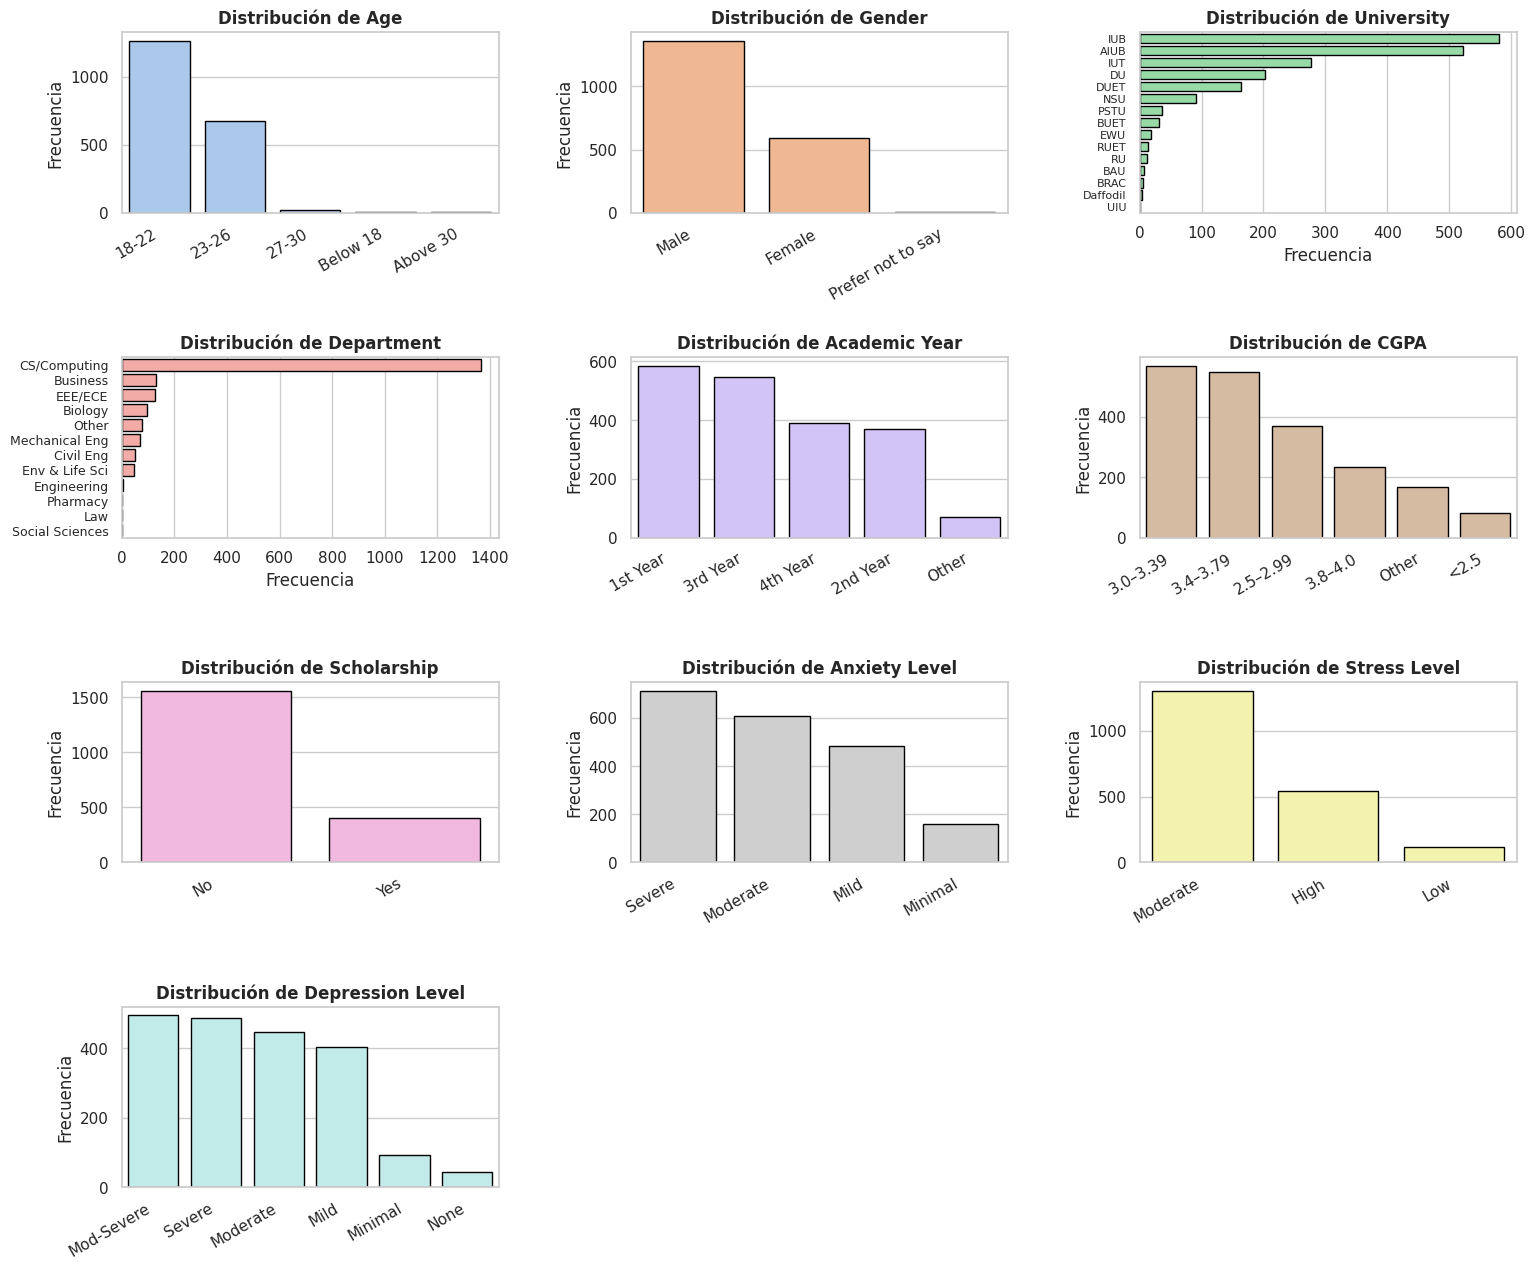

In [36]:
# Configuración general del tema de los gráficos
sns.set(style="whitegrid")
palette = sns.color_palette("pastel") #elegir el color de los  gráficos

#definir las variables a graficar
cols_titles = {
    "Age": "Distribución de Age",
    "Gender": "Distribución de Gender",
    "University": "Distribución de University",
    "Department": "Distribución de Department",
    "Academic_Year": "Distribución de Academic Year",
    "CGPA": "Distribución de CGPA",
    "Scholarship": "Distribución de Scholarship",
    "Anxiety_Level": "Distribución de Anxiety Level",
    "Stress_Level": "Distribución de Stress Level",
    "Depression_Level": "Distribución de Depression Level"}

#columnas con orientación horizontal
horizontal_cols = ["University", "Department"]

#Lienzo de las figuras, configuración del tamaño
fig, axes = plt.subplots(4, 3, figsize=(18, 15))
axes = axes.flatten()

#Bucle for para generar cada gráfico
for i, (col, title) in enumerate(cols_titles.items()):
    if i >= len(axes):
        break
    ax = axes[i]
    color = palette[i % len(palette)]

    if col == "University":
        order = df[col].value_counts().index
        sns.countplot(y=col, data=df, order=order, ax=ax, color=color, edgecolor="black")
        ax.set_xlabel("Frecuencia")
        ax.set_ylabel("")
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
    elif col == "Department":
        order = df[col].value_counts().index
        sns.countplot(y=col, data=df, order=order, ax=ax, color=color, edgecolor="black")
        ax.set_xlabel("Frecuencia")
        ax.set_ylabel("")
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)
    else:
        order = df[col].value_counts().index
        sns.countplot(x=col, data=df, order=order, ax=ax, color=color, edgecolor="black")
        ax.set_xlabel("")
        ax.set_ylabel("Frecuencia")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

    ax.set_title(title, fontsize=12, weight="bold")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

#Ajuste de separación entre gráficos
plt.subplots_adjust(wspace=0.35, hspace=0.8)
plt.show()

###Interpretación de las gráficas
**Distribución de Age:**
La mayoría de los participantes tiene entre 18 y 22 años, lo cual indica que la muestra está compuesta principalmente por jóvenes universitarios. Las demás categorías (23-26, 27-30 y mayores de 30) tienen una representación mucho menor.</br>
**Distribución de Gender:**
Predomina el género masculino en la muestra, seguido por el femenino. Un porcentaje muy pequeño prefirió no especificar su género.</br>
**Distribución de University:**
Se observa que algunas universidades concentran la mayor parte de los participantes, mientras que otras tienen una representación mucho menor.</br>
**Distribución de Department:**
El mayor número de estudiantes pertenece a áreas relacionadas con Computación o Ingeniería en Sistemas, seguidas por Negocios, EEE/ECE y Biología. Los demás departamentos tienen una representación menor.</br>
**Distribución de Academic Year:**
La mayoría de los participantes cursa primer o tercer año, mientras que los de segundo y cuarto año son menos frecuentes.</br>
**Distribución de CGPA:**
La mayor parte de los estudiantes tiene un promedio entre 3.0 y 3.39, seguido por el rango de 3.4 a 3.79. Esto sugiere que la mayoría mantiene un rendimiento académico medio a alto.</br>
**Distribución de Scholarship:**
La mayoría de los estudiantes no cuenta con beca.</br>
**Distribución de Anxiety Level:**
Los niveles de ansiedad más frecuentes son moderado y severo, lo que refleja una tendencia preocupante hacia niveles altos de ansiedad en la población estudiantil.</br>
**Distribución de Stress Level:**
Predomina el nivel de estrés moderado, seguido por el alto, mientras que pocos estudiantes reportan bajo estrés. Esto sugiere una carga emocional significativa entre los participantes.</br>
**Distribución de Depression Level:**
Los niveles de depresión leve a moderada son los más comunes, aunque también hay una proporción importante de casos severos. Esto indica la necesidad de prestar atención a la salud mental en los entornos universitarios.

#**3- Análisis de variables númericas**

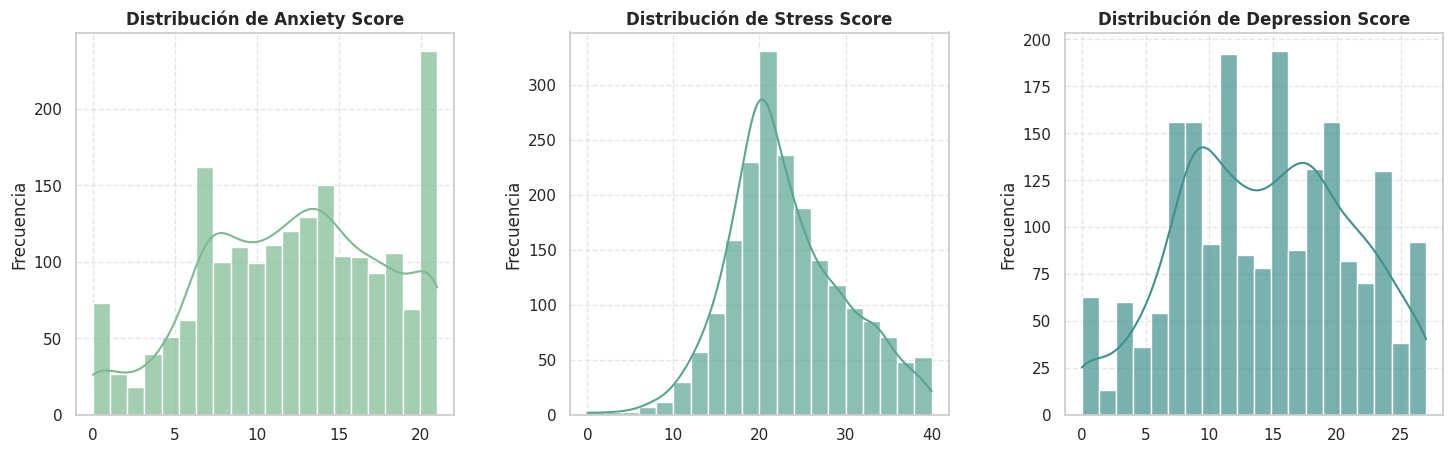

In [37]:
#Estilo general
sns.set(style="whitegrid", palette="crest")

# Variables numéricas
numeric_vars = ["Anxiety_Score", "Stress_Score", "Depression_Score"]

#Creación de las figuras
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Graficar cada variable
for i, var in enumerate(numeric_vars):
    sns.histplot(
        df[var],
        bins=20,
        kde=True,
        color=sns.color_palette("crest")[i],
        ax=axes[i],
        alpha=0.7)
    axes[i].set_title(f"Distribución de {var.replace('_', ' ')}", fontsize=12, weight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")
    axes[i].grid(True, linestyle='--', alpha=0.5)

#Ajustar espacios entre gráficos
plt.tight_layout(pad=2.0, w_pad=3.0)
plt.show()

###Interpretación de las gráficas
**Distribución de Anxiety Score**
La puntuación de ansiedad muestra una distribución amplia y ligeramente bimodal, con valores que van de 0 a 21. Muchos participantes tienen niveles medios de ansiedad (alrededor de 10-15 puntos), aunque también hay un grupo considerable de niveles altos (más de 18 puntos), lo que sugiere que los niveles de ansiedad en la muestra son moderados a altos. Se observan algunos casos con valores bajos, aunque en menor proporción, indicando que la ansiedad está presente en gran parte de los individuos.</br>
**Distribución de Stress Score**
La puntuación de estrés presenta una distribución sesgada hacia la derecha, con un pico entre 18 y 25 puntos. Esto refleja que la mayoría de los participantes experimenta niveles moderados de estrés, mientras que los valores más altos (mayores de 30) son menos frecuentes. La forma de la curva sugiere una tendencia general al estrés medio-alto, sin casos extremos predominantes.</br>
**Distribución de Depression Score**
La puntuación de depresión también evidencia una distribución amplia, con la mayoría de los valores situados entre 8 y 20 puntos. La presencia de dos picos sugiere variabilidad en los niveles de depresión, con un grupo de participantes que presenta síntomas leves y otro grupo con síntomas moderados a severos. En conjunto, la tendencia general indica que la depresión afecta a una proporción considerable de la población analizada.

##**Boxplots por género**

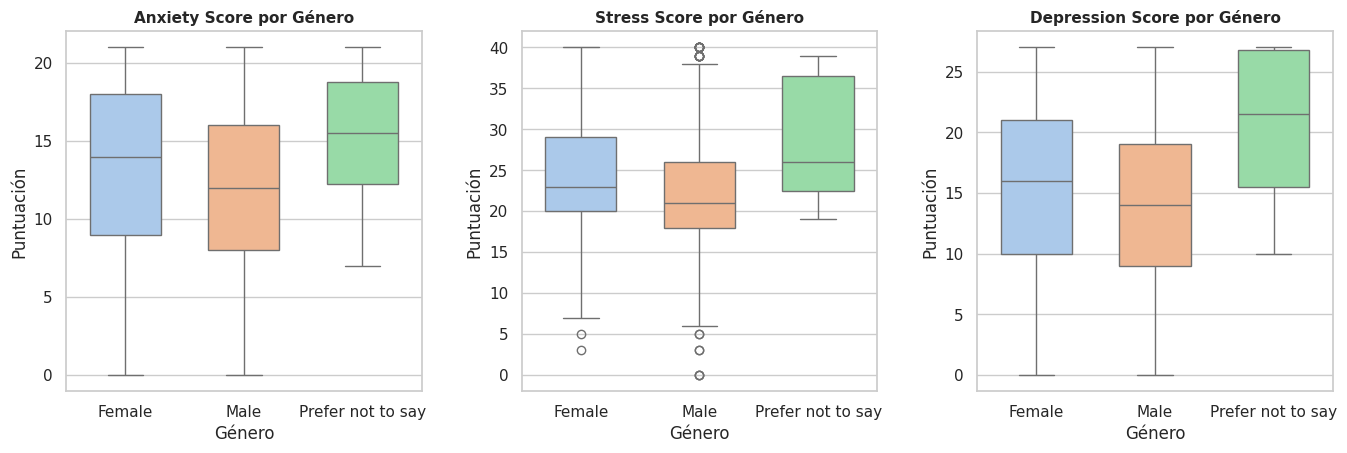

In [38]:
#Configuración de estilo
sns.set(style="whitegrid", palette="pastel")

#Variables numéricas
numeric_vars = ["Anxiety_Score", "Stress_Score", "Depression_Score"]

#Crear figura con 3 subgráficos
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

for i, var in enumerate(numeric_vars):
    sns.boxplot(data=df, x="Gender", y=var, ax=axes[i], palette="pastel", width=0.6)
    axes[i].set_title(f"{var.replace('_', ' ')} por Género", fontsize=11, weight='bold')
    axes[i].set_xlabel("Género")
    axes[i].set_ylabel("Puntuación")
    axes[i].tick_params(axis='x', rotation=False)

plt.tight_layout(pad=2.0)
plt.show()

###Interpretación de las gráficas
En los diagramas de caja que comparan las puntuaciones de ansiedad, estrés y depresión según el género, se observa que las distribuciones presentan comportamientos diferenciados entre los grupos.</br>
Las puntuaciones de ansiedad muestran medianas ligeramente más elevadas en las mujeres y en el grupo que prefirió no especificar su género, en comparación con los hombres.</br>
En cuanto al estrés, las diferencias entre géneros son más notorias. El grupo que prefirió no declarar su género presenta la mediana más alta, seguido por las mujeres, mientras que los hombres exhiben las puntuaciones centrales más bajas. Este patrón sugiere una mayor tendencia a experimentar estrés entre las mujeres y el grupo “Prefer not to say”. Asimismo, se observan algunos valores atípicos en los hombres, lo que evidencia la presencia de respuestas extremas, aunque poco frecuentes.</br>
Por último, las puntuaciones de depresión reflejan una tendencia similar a la del estrés. El grupo que no especificó su género presenta la mediana más elevada y una dispersión mayor, lo cual podría estar asociado a una mayor heterogeneidad emocional dentro de este grupo. Las mujeres también muestran valores más altos en comparación con los hombres, quienes, en general, reportan las puntuaciones más bajas.</br>
En conjunto, los resultados indican que los niveles promedio de ansiedad, estrés y depresión son consistentemente más altos en mujeres y en personas que prefirieron no declarar su género, mientras que los hombres presentan niveles menores en las tres dimensiones. Este patrón sugiere posibles diferencias en la percepción o manifestación emocional según el género, que podrían explorarse en análisis posteriores.

##**Boxplots según el año académico**

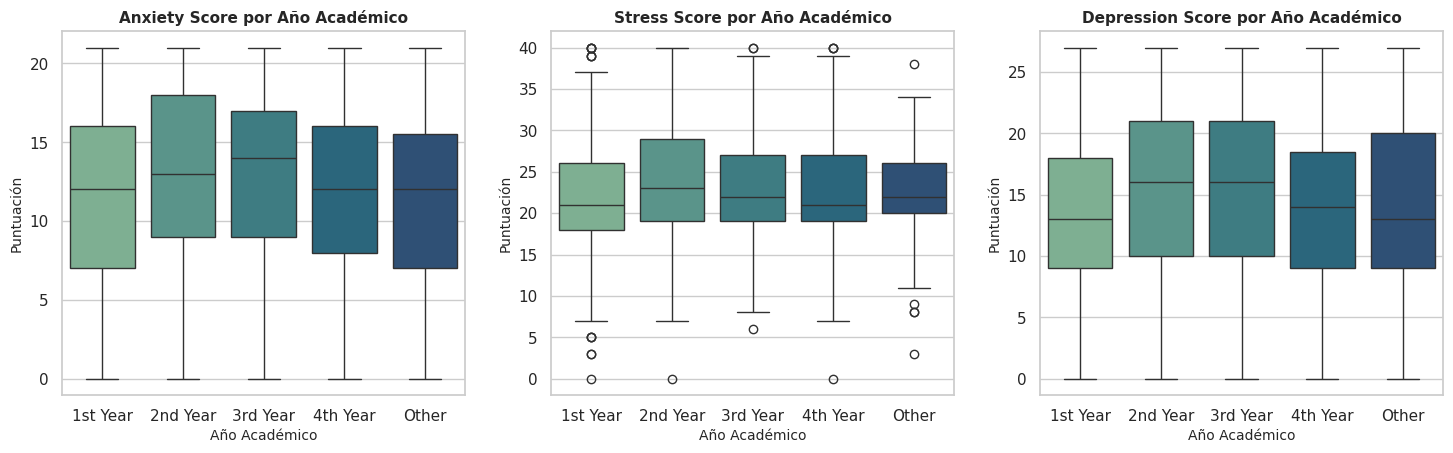

In [39]:
sns.set(style="whitegrid")

# Orden deseado
orden_anios = ["1st Year", "2nd Year", "3rd Year", "4th Year", "Other"]
numeric_vars = ["Anxiety_Score", "Stress_Score", "Depression_Score"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
palette = sns.color_palette("crest", len(orden_anios))

for i, var in enumerate(numeric_vars):
    sns.boxplot(
        data=df,
        x="Academic_Year",
        y=var,
        order=orden_anios,
        palette=palette,
        ax=axes[i]
    )
    axes[i].set_title(f"{var.replace('_', ' ')} por Año Académico", fontsize=11, weight='bold')
    axes[i].set_xlabel("Año Académico", fontsize=10)
    axes[i].set_ylabel("Puntuación", fontsize=10)

plt.tight_layout(pad=2)
plt.show()

###Interpretación de las gráficas
Los puntajes de ansiedad, estrés y depresión muestran un patrón similar entre los años académicos. En general, se observa un ligero aumento en los niveles de ansiedad y depresión durante los años intermedios (2nd y 3rd Year), seguido de una disminución en el 4th Year, lo que podría reflejar una mejor adaptación al entorno universitario.</br>
El estrés presenta mayor dispersión, especialmente en el segundo año, donde algunos estudiantes alcanzan valores más altos. En conjunto, los resultados sugieren que las exigencias académicas medias del programa generan picos de malestar emocional, mientras que en los últimos años tiende a haber una mayor estabilidad emocional.

##**Boxplots según la Universidad**

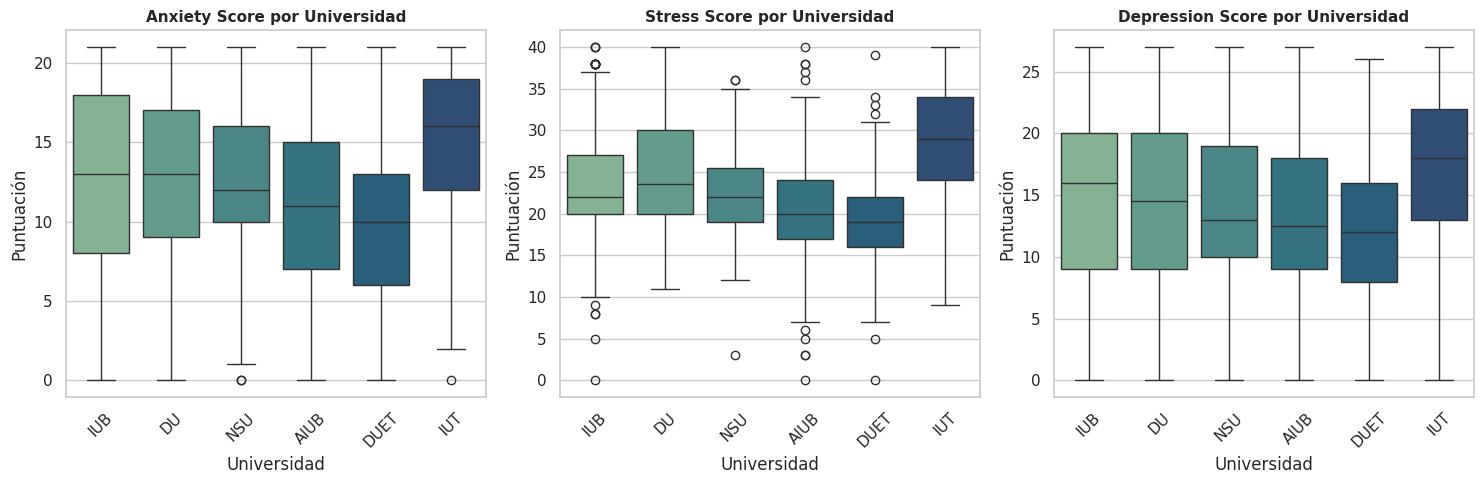

In [40]:
uni_counts = df['University'].value_counts()
valid_unis = uni_counts[uni_counts >= 50].index
df_uni_filt = df[df['University'].isin(valid_unis)]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate(["Anxiety_Score", "Stress_Score", "Depression_Score"]):
    sns.boxplot(data=df_uni_filt, x="University", y=var, ax=axes[i], palette="crest")
    axes[i].set_title(f"{var.replace('_', ' ')} por Universidad", fontsize=11, weight='bold')
    axes[i].set_xlabel("Universidad")
    axes[i].set_ylabel("Puntuación")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

###Interpretación de las gráficas
Los gráficos comparan la distribución de las puntuaciones de ansiedad, estrés y depresión entre estudiantes de distintas universidades de Bangladesh. En este análisis se incluyen instituciones como Independent University, Bangladesh (IUB), Dhaka University (DU), North South University (NSU), American International University Bangladesh (AIUB), Dhaka University of Engineering and Technology (DUET) e Islamic University of Technology (IUT).</br>
- **Ansiedad (Anxiety Score):**
Se observa una variabilidad considerable entre universidades. Los estudiantes de Islamic Uiversity of Technology (IUT) presenta las puntuaciones de medianas más altas (16-17 puntos) y una dispersión relativamente baja. En contraste los estudiantes de Dhaka University of Engineering and Technology (DUET) muestran los valores mas bajos. Las universidades University, Bangladesh (IUB) y Dhaka University (DU) presentan niveles intermedios con una dispersión mayor, lo que indica niveles de ansiedad más diversos entre sus estudiantes</br>
- **Estrés (Stress Score):**
La Islamic University of Technology (IUT) destaca con una mediana claramente más alta, lo que indica mayores niveles promedio de estrés entre sus estudiantes. Las universidades IUB y DU también presentan cierta dispersión hacia valores altos, pero con medianas más moderadas. En contraste, DUET muestra los niveles de estrés más bajos, evidenciando un contraste marcado frente a otras instituciones.</br>
- **Depresión (Depression Score):**
El patrón es similar al de la ansiedad: la Islamic University of Technology (IUT) presenta las puntuaciones más elevadas tanto en la mediana como en el rango intercuartílico, lo que sugiere una mayor prevalencia de síntomas depresivos. En cambio, American International University Bangladesh (AIUB) y Dhaka University of Engineering and Technology (DUET) registran medianas más bajas, lo que podría reflejar un menor impacto en este aspecto de salud mental.</br>
En conclusión, las distribuciones muestran diferencias visibles entre universidades en los tres indicadores de salud mental. Estas variaciones podrían estar asociadas a factores académicos, institucionales o contextuales propios de cada entorno universitario.

##**Boxplots por Becas**

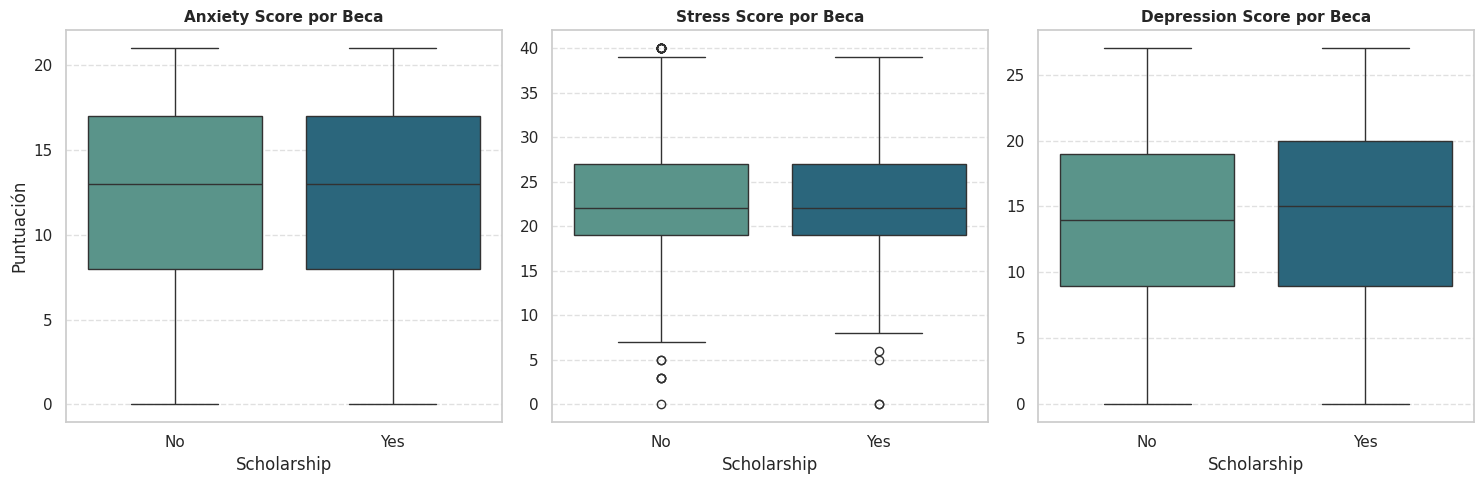

In [41]:
vars_numericas = ["Anxiety_Score", "Stress_Score", "Depression_Score"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)  # NOTA: sharey=False
sns.set_style("whitegrid")
palette = "crest"

for ax, var in zip(axes, vars_numericas):
    sns.boxplot(data=df, x="Scholarship", y=var, palette=palette, ax=ax)
    ax.set_title(var.replace("_", " ") + " por Beca", fontsize=11, fontweight='bold')
    ax.set_xlabel("Scholarship")
    ax.set_ylabel("Puntuación" if ax == axes[0] else "")
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

###Interpretación de las gráficas

Los boxplots permiten comparar los niveles de ansiedad, estrés y depresión entre los estudiantes que reciben una beca (Yes) y aquellos que no la reciben (No). </br>
En general, las distribuciones muestran diferencias leves entre ambos grupos, aunque con patrones interesantes que pueden reflejar distintos factores académicos o socioeconómicos asociados al acceso a becas.</br>
- **Ansiedad (Anxiety Score):**
Las medianas y la dispersión de las puntuaciones son muy similares entre estudiantes con y sin beca. Esto sugiere que el hecho de recibir una beca no parece influir de manera notable en los niveles de ansiedad. Ambos grupos presentan una variabilidad moderada, con algunos valores extremos hacia niveles bajos de ansiedad.</br>
- **Estrés (Stress Score):**
En este caso, las medianas también son comparables entre los dos grupos, aunque se observa una ligera tendencia a niveles de estrés algo menores en los becados, reflejando posiblemente un alivio económico o académico.</br>
- **Depresión (Depression Score):**
Las puntuaciones de depresión muestran medianas prácticamente iguales para ambos grupos, aunque los estudiantes con beca presentan una ligeramente mayor dispersión, con algunos casos de puntuaciones más altas. Esto podría indicar que, aunque la beca puede representar un apoyo, no necesariamente reduce los niveles de síntomas depresivos en todos los estudiantes, ya que influyen otros factores personales o contextuales.</br>
En conclusión, los resultados sugieren que el factor "beca" no marca grandes diferencias en los niveles de ansiedad, estrés o depresión. La similitud en las medianas y rangos intercuartílicos indica que ambos grupos comparten distribuciones semejantes.

##**Boxplots por departamento académico**

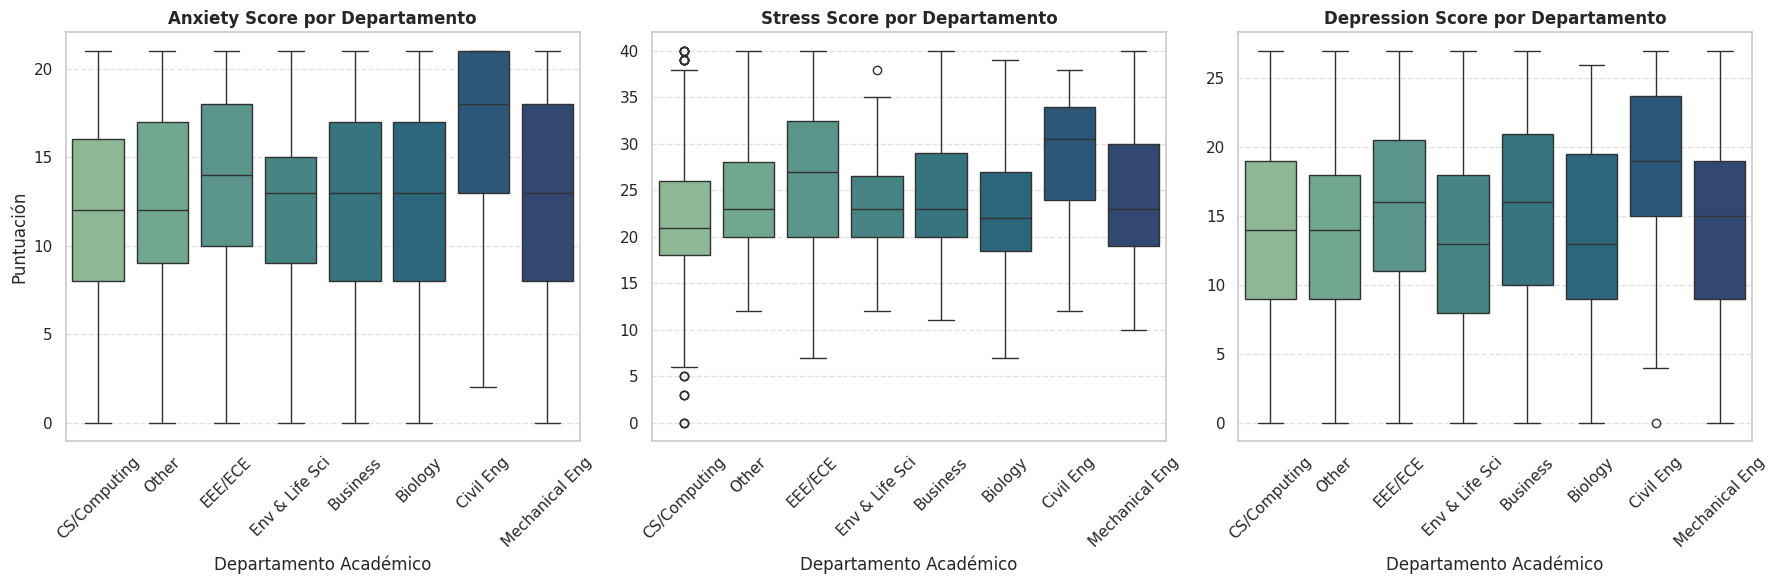

In [42]:
# Filtrar los departamentos con más de 46 estudiantes
dept_counts = df["Department"].value_counts()
dept_validos = dept_counts[dept_counts > 46].index
df_filtrado = df[df["Department"].isin(dept_validos)]

# Variables numéricas a graficar
vars_numericas = ["Anxiety_Score", "Stress_Score", "Depression_Score"]

# Estilo visual
sns.set_style("whitegrid")
palette = "crest"

# Crear figura y ejes
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for ax, var in zip(axes, vars_numericas):
    sns.boxplot(
        data=df_filtrado,
        x="Department",
        y=var,
        palette=palette,
        ax=ax
    )
    ax.set_title(var.replace("_", " ") + " por Departamento", fontsize=12, fontweight='bold')
    ax.set_xlabel("Departamento Académico")
    ax.set_ylabel("Puntuación" if ax == axes[0] else "")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

###Interpretación de las gráficas
Las gráficas presentan la comparación de las puntuaciones de ansiedad, estrés y depresión entre los diferentes departamentos académicos de los estudiantes. Este análisis permite identificar si existen diferencias notables en la salud mental según el campo de estudio.</br>
- **Ansiedad (Anxiety Score):**
Se observa que la mayoría de los departamentos tienen medianas similares, aunque los estudiantes de Civil Engineering presentan los valores más altos de ansiedad promedio, junto con una mayor dispersión en sus puntuaciones. En contraste, los departamentos de Computing, Environmental & Life Sciences y Mechanical Engineering muestran medianas más bajas, lo que sugiere niveles de ansiedad ligeramente menores en esos grupos.</br>
- **Estrés (Stress Score):**
El nivel de estrés presenta variaciones más evidentes entre los departamentos. Los estudiantes de Electrical and Electronic Engineering (EEE/ECE) y Civil Engineering registran las medianas más altas, indicando una tendencia a mayores niveles de estrés. En cambio, los de Computing y Biología muestran puntuaciones más bajas, con menos dispersión. Estos resultados podrían estar relacionados con la carga académica o la naturaleza de los programas de ingeniería, que suelen ser más exigentes.</br>
- **Depresión (Depression Score):**
En el caso de la depresión, los departamentos de Civil Engineering y Business destacan por tener las medianas más elevadas, lo que sugiere una mayor prevalencia de síntomas depresivos. Los estudiantes de Environmental & Life Sciences y Mechanical Engineering tienden a presentar medianas más bajas, con menor variabilidad.</br>
En conclusión, los resultados muestran que los niveles de ansiedad, estrés y depresión varían entre los diferentes departamentos académicos. En general, las áreas de ingeniería (especialmente Civil y EEE/ECE) parecen asociarse con mayores niveles de estrés y ansiedad, posiblemente debido a la alta carga académica y las demandas técnicas. Por el contrario, Computing y Life Sciences presentan niveles más moderados.</br>
Estos hallazgos evidencian la importancia de considerar el contexto académico como un factor relevante al analizar la salud mental estudiantil.

##**Boxplots por edad (Age)**

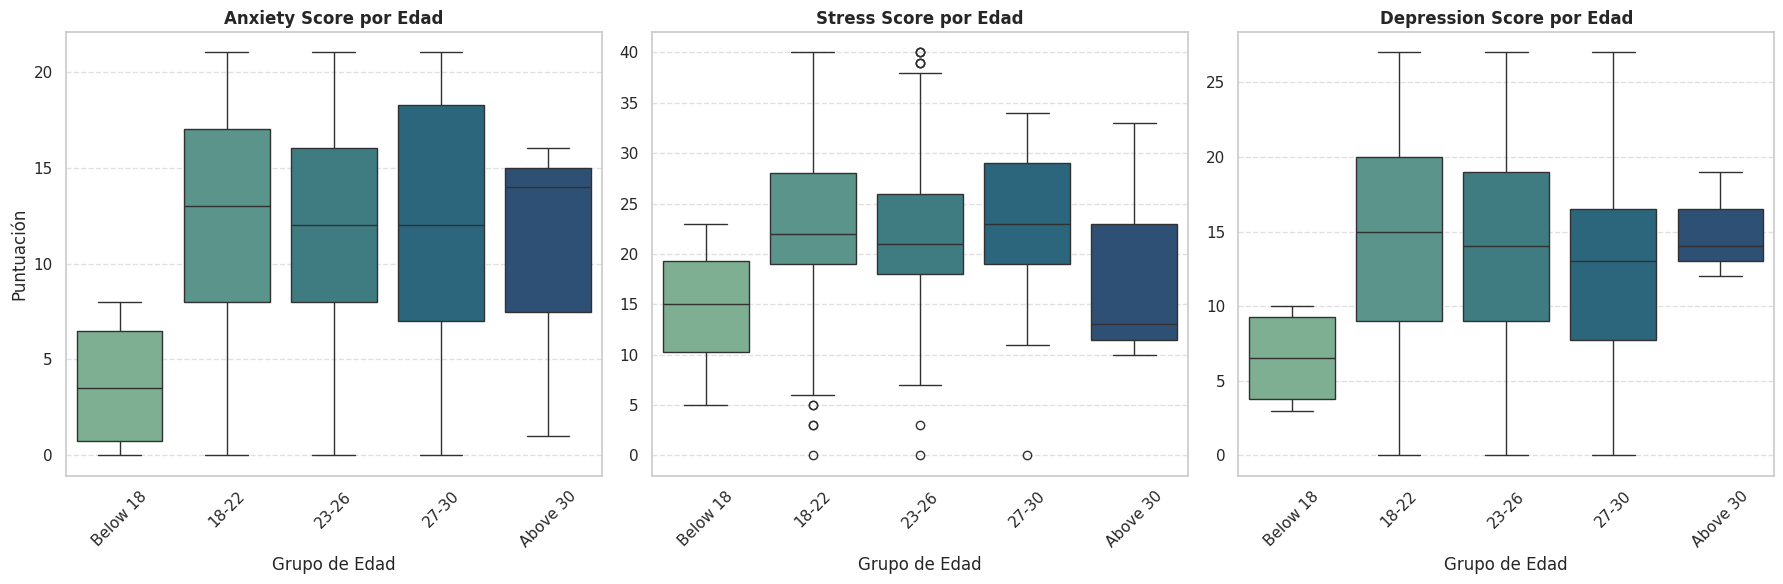

In [43]:
# Definir el orden correcto de los grupos de edad
orden_edades = [
    "Below 18", "18-22", "23-26", "27-30", "Above 30"
]

# Variables numéricas
vars_numericas = ["Anxiety_Score", "Stress_Score", "Depression_Score"]

# Estilo visual
sns.set_style("whitegrid")
palette = "crest"

# Crear figura y ejes
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for ax, var in zip(axes, vars_numericas):
    sns.boxplot(
        data=df,
        x="Age",
        y=var,
        order=orden_edades,  # 👈 forzamos el orden lógico
        palette=palette,
        ax=ax
    )
    ax.set_title(f"{var.replace('_', ' ')} por Edad", fontsize=12, fontweight='bold')
    ax.set_xlabel("Grupo de Edad")
    ax.set_ylabel("Puntuación" if ax == axes[0] else "")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

###Interpretación de las gráficas
Los boxplots comparan las puntuaciones de ansiedad, estrés y depresión entre distintos grupos etarios. Este análisis permite observar si los síntomas de salud mental tienden a cambiar con la edad.</br>
- **Ansiedad (Anxiety Score):**
Se observa un aumento progresivo de la ansiedad desde los grupos más jóvenes hacia los adultos jóvenes. Los menores de 18 años presentan las puntuaciones más bajas y menos dispersas, mientras que los grupos de 27–30 años alcanzan las medianas más altas. Esto sugiere que la ansiedad tiende a incrementarse con la edad, posiblemente por mayores responsabilidades académicas o laborales.</br>
- **Estrés (Stress Score):**
El estrés también presenta un patrón ascendente hasta los 27–30 años, grupo que muestra la mayor mediana y una amplia dispersión de valores. En cambio, los participantes mayores de 30 años registran un descenso notable en sus puntuaciones, lo que podría indicar una mejor gestión emocional o adaptación a las demandas externas con la madurez.</br>
- **Depresión (Depression Score):**
Los niveles de depresión aumentan drásticamente entre los 18 y 26 años, alcanzando medianas altas en los grupos de 18–22 y 23–26 años, y luego tienden a estabilizarse o disminuir levemente en edades mayores. Este comportamiento puede estar relacionado con la transición universitaria, la presión académica y la incertidumbre profesional típica de estas etapas.</br>
En conjunto, los resultados indican que los niveles de ansiedad, estrés y depresión tienden a ser más altos en los adultos jóvenes (18–30 años), especialmente en comparación con los menores de edad o los mayores de 30. Esto sugiere que la etapa universitaria y de inserción laboral representa un periodo de mayor vulnerabilidad emocional, lo que refuerza la importancia de ofrecer apoyo psicológico preventivo a este grupo.

##**Mapa de calor de correlación entre variables numéricas.**

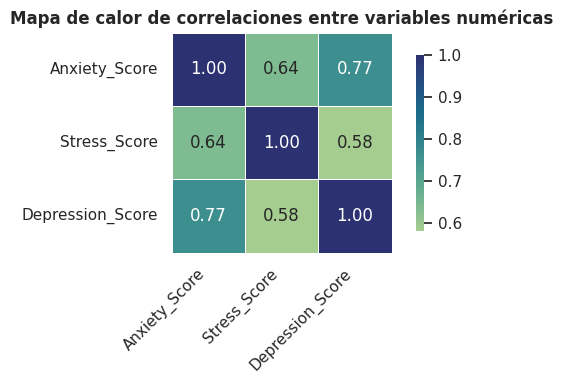

In [44]:
# Seleccionamos solo las variables numéricas
numeric_vars = ["Anxiety_Score", "Stress_Score", "Depression_Score"]

# Calculamos la matriz de correlación
corr_matrix = df[numeric_vars].corr()

# Configuración estética
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="crest", fmt=".2f", linewidths=0.5,
            cbar_kws={"shrink": 0.8}, square=True)

plt.title("Mapa de calor de correlaciones entre variables numéricas", fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

###Interpretación de la gráfica
El mapa de calor muestra correlaciones positivas entre las tres variables de salud mental. La relación más fuerte se da entre ansiedad y depresión (r = 0.77), seguida por ansiedad y estrés (r = 0.64), y finalmente estrés y depresión (r = 0.58). Esto indica que, a medida que aumentan los niveles de ansiedad, también tienden a aumentar los de depresión y estrés, evidenciando una asociación significativa entre los tres indicadores emocionales.

#**4- Pruebas de hipótesis**

Una vez realizado el análisis exploratorio de los datos, se identificaron patrones y posibles diferencias entre grupos en variables relacionadas con la salud mental de los estudiantes universitarios(ansiedad, estrés y depresión). Estas observaciones sugirieron la existencia de factores sociodemográficos y académicos que podrían influir en dichos niveles. Con el fin de corroborar estadísticamente los hallazgos del análisis exploratorio, se aplicaron diversas pruebas de hipótesis para determinar si las diferencias observadas son significativas.

El nivel de significancia adoptado para el presente análisis es de α = 0.05, correspondiente a un intervalo de confianza del 95%. Esto implica que se aceptará una probabilidad máxima del 5% de cometer un error tipo I (rechazar la hipótesis nula siendo verdadera). A partir de este criterio se interpretarán los resultados obtenidos en las pruebas de hipótesis planteadas a continuación.


##**Hipótesis 1: Relación entre la ansiedad, el estrés y la depresión en los estudiantes**
El análisis descriptivo y el mapa de calor mostraron tendencias similares entre las tres variables, lo que sugiere que podrían aumentar o disminuir juntas.

H₀: No existe una correlación significativa entre los niveles de ansiedad, estrés y depresión en los estudiantes universitarios.

H₁: Existe una correlación positiva significativa entre los niveles de ansiedad, estrés y depresión en los estudiantes universitarios.

**Prueba estadística:** Prueba de correlación Spearman

**Tipo de variables**

Dependiente: Anxiety_Score, Stress_Score, Depression_Score (numéricas continuas)


In [45]:
#Variables a analizar
variables = ["Anxiety_Score", "Stress_Score", "Depression_Score"]

#Verificar normalidad con Shapiro-Wilk
for var in variables:
    stat, p = shapiro(df[var])
    print(f"{var}: p={p}")
    if p > 0.05:
        print("Distribución normal")
    else:
        print("No normal")
    print("-" * 40)
#Crear matrices vacías
corr_matrix = pd.DataFrame(index=vars_numericas, columns=vars_numericas)
pval_matrix = pd.DataFrame(index=vars_numericas, columns=vars_numericas)

#Calcular correlación y p-valor
for var1 in vars_numericas:
    for var2 in vars_numericas:
        rho, pval = spearmanr(df[var1], df[var2])
        corr_matrix.loc[var1, var2] = round(rho, 6)
        pval_matrix.loc[var1, var2] = f"{pval:.3e}"

print("MATRIZ DE CORRELACIÓN (Spearman rho):\n")
print(corr_matrix)

print("\nMATRIZ DE P-VALORES:\n")
print(pval_matrix)



Anxiety_Score: p=4.3540899191594635e-20
No normal
----------------------------------------
Stress_Score: p=6.168933177414091e-16
No normal
----------------------------------------
Depression_Score: p=2.064936292110883e-15
No normal
----------------------------------------
MATRIZ DE CORRELACIÓN (Spearman rho):

                 Anxiety_Score Stress_Score Depression_Score
Anxiety_Score              1.0     0.648833         0.768414
Stress_Score          0.648833          1.0         0.590813
Depression_Score      0.768414     0.590813              1.0

MATRIZ DE P-VALORES:

                 Anxiety_Score Stress_Score Depression_Score
Anxiety_Score        0.000e+00   3.337e-235        0.000e+00
Stress_Score        3.337e-235    0.000e+00       2.976e-185
Depression_Score     0.000e+00   2.976e-185        0.000e+00


 **Selección de la prueba estadística:**

La prueba de normalidad de Shapiro-Wilk mostró que todos los valores p son considerablemente menores que 0.05; por consiguiente, se rechaza la hipótesis nula de normalidad. Esto indica que las tres variables ansiedad, estrés y depresión, presentan distribuciones no normales, por lo que los análisis de correlación o comparación de grupos deben realizarse mediante pruebas no paramétricas. En este sentido, se empleó la correlación de Spearman (ρ), que constituye la alternativa no paramétrica al coeficiente de Pearson. Esta prueba se basa en los rangos de los valores y no en los valores originales, por lo que no requiere el supuesto de normalidad ni homocedasticidad. Además, permite evaluar la fuerza y dirección de relaciones monótonas (crecientes o decrecientes) entre las variables, incluso en presencia de datos atípicos o distribuciones asimétricas. Por tanto, la elección de la prueba de Spearman resulta adecuada para determinar la relación entre los niveles de ansiedad, estrés y depresión de manera robusta y consistente con la naturaleza de los datos observados.

**Interpretación:**

Las tres variables están altamente relacionadas entre sí, lo que sugiere que los estudiantes con niveles elevados de ansiedad tienden también a mostrar mayores niveles de estrés y depresión.</br>
La relación más fuerte se da entre ansiedad y depresión (ρ = 0.77), lo cual refleja que ambos estados emocionales comparten una base común de malestar psicológico.</br>
Dado que los valores de p-value son menores a 0.05 en todas las comparaciones, se rechaza la hipótesis nula (H₀) que plantea que no hay correlación entre las variables, y se acepta la hipótesis alternativa (H₁) que indica la existencia de una correlación positiva y significativa.

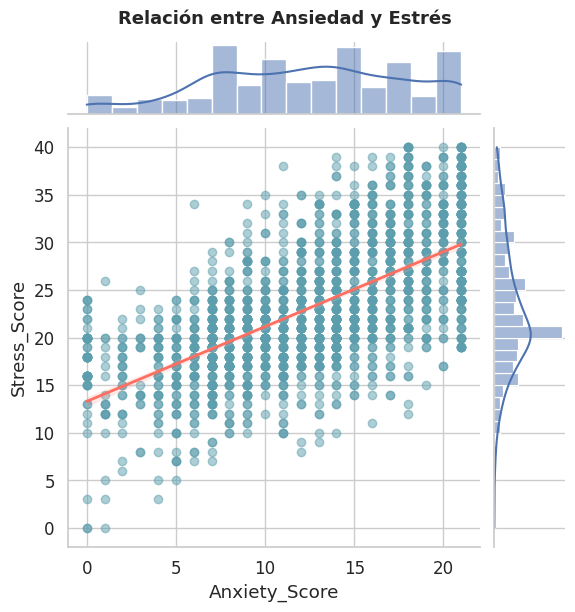

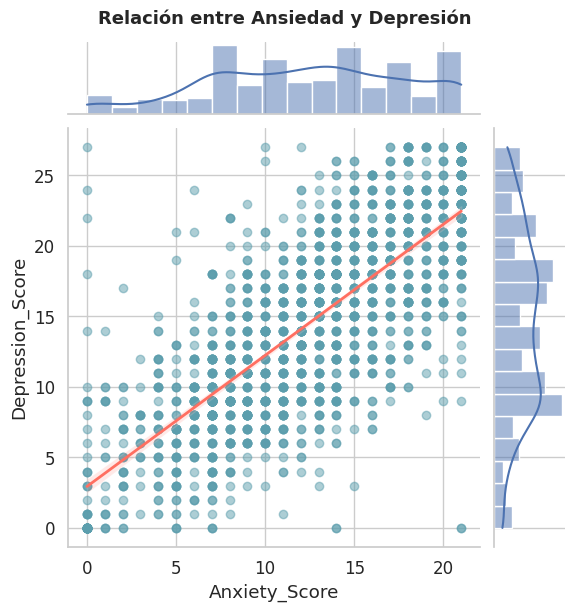

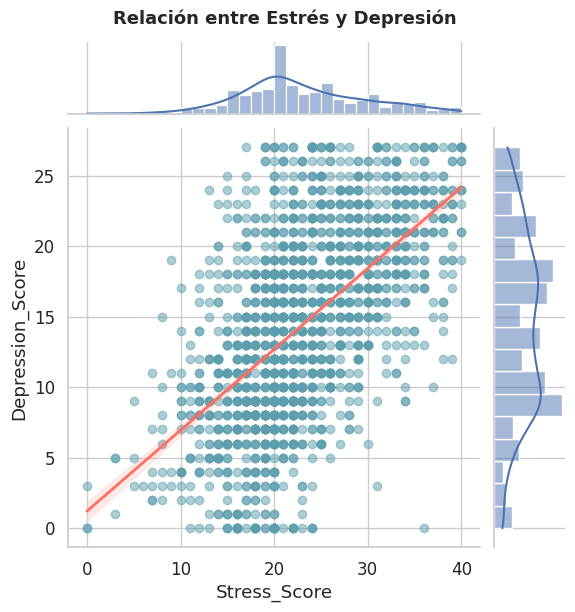

In [46]:
sns.set(style="whitegrid", font_scale=1.1)

# Ansiedad vs Estrés
sns.jointplot(data=df, x="Anxiety_Score", y="Stress_Score", kind="reg",
              scatter_kws={"alpha": 0.5, "color": "#5C9EAD"},
              line_kws={"color": "#FF6F61", "lw": 2})
plt.suptitle("Relación entre Ansiedad y Estrés", y=1.02, fontsize=13, weight='bold')
plt.show()

# Ansiedad vs Depresión
sns.jointplot(data=df, x="Anxiety_Score", y="Depression_Score", kind="reg",
              scatter_kws={"alpha": 0.5, "color": "#5C9EAD"},
              line_kws={"color": "#FF6F61", "lw": 2})
plt.suptitle("Relación entre Ansiedad y Depresión", y=1.02, fontsize=13, weight='bold')
plt.show()

# Estrés vs Depresión
sns.jointplot(data=df, x="Stress_Score", y="Depression_Score", kind="reg",
              scatter_kws={"alpha": 0.5, "color": "#5C9EAD"},
              line_kws={"color": "#FF6F61", "lw": 2})
plt.suptitle("Relación entre Estrés y Depresión", y=1.02, fontsize=13, weight='bold')
plt.show()

###Interpretación de las relaciones entre variables

Las gráficas muestran la relación entre las variables de salud mental:

* **Relación entre Ansiedad y Estrés:** Se observa una tendencia lineal ascendente; a mayor nivel de ansiedad, el estrés también tiende a incrementarse.
* **Relación entre Ansiedad y Depresión:** Existe una relación positiva fuerte, lo que indica que los participantes con mayor ansiedad presentan mayores niveles de depresión.
* **Relación entre Estrés y Depresión:** También hay una relación positiva, aunque con una dispersión ligeramente mayor, lo que sugiere que el estrés influye, pero no de forma tan directa como la ansiedad.

En conjunto, las tres variables presentan **asociaciones positivas**, respaldando la idea de que los síntomas de ansiedad, estrés y depresión suelen coexistir


##**Hipótesis 2:  Diferencias por género en salud mental**
En los boxplots por género se observaron diferencias visuales en las medianas y dispersión de las puntuaciones.

H₀: No existen diferencias significativas en los niveles de ansiedad, estrés y depresión según el género del estudiante.

H₁: Existen diferencias significativas en los niveles de ansiedad, estrés y depresión según el género del estudiante.

**Prueba estadística:** t de Student (paramétrica) y
Mann-Whitney U (no paramétrica)

**Tipo de variables:**

Variable dependiente: Depression_Score, Anxiety_Score y Stress_Score,  (numéricas continuas)

Variable independiente: Gender (categórica)



In [47]:
# Dividir los grupos a analizar solo femenino y masculino
male = df[df['Gender'] == 'Male']
female = df[df['Gender'] == 'Female']

# Definir las variables dependientes a analizar
variables = ['Anxiety_Score', 'Stress_Score', 'Depression_Score']

print("PRUEBA DE HIPÓTESIS POR GÉNERO\n")

#Bucle para repetir los mismos pasos para cada variable objetivo
for var in variables:
    print(f"Variable: {var}\n")

    #Prueba de normalidad de Shapiro
    stat_m, p_m = shapiro(male[var])
    stat_f, p_f = shapiro(female[var])

    print(f"Shapiro-Wilk:")
    print(f"Hombres → p = {p_m}")
    print(f"Mujeres → p = {p_f}")

    normales = (p_m > 0.05 and p_f > 0.05)

    #Prueba de homogeneidad de varianzas
    stat_lev, p_lev = levene(male[var], female[var])
    print(f"Levene → p = {p_lev}")

    #Selección de prueba paramétrica
    #si hay normalidad o muestra grande mayor a 30 (TLC), usamos prueba t
    if normales or (len(male) > 30 and len(female) > 30):
        if p_lev > 0.05: #si varianzas son homogeneas aplicar t de student
            stat_t, p_t = ttest_ind(male[var], female[var], equal_var=True)
            prueba_t = "T de Student (varianzas iguales)"
        else: #si varianzas no son homogenes aplicar T de Welch
            stat_t, p_t = ttest_ind(male[var], female[var], equal_var=False)
            prueba_t = "T de Welch (varianzas distintas)"

        print(f"\n{prueba_t}")
        print(f"Estadístico t = {stat_t}, p = {p_t}")
        if p_t < 0.05:
            print("Se rechaza H₀ → Existen diferencias significativas entre géneros.")
        else:
            print("No se rechaza H₀ → No hay diferencias significativas entre géneros.")

    else:
        print("\nNo hay normalidad ni tamaño muestral suficiente → Se recomienda prueba no paramétrica.")

    #Aplicar la No paramétrica de la T-student (Mann–Whitney como comparación)
    stat_u, p_u = mannwhitneyu(male[var], female[var], alternative='two-sided')
    print(f"\nU de Mann–Whitney (comparación no paramétrica)")
    print(f"Estadístico U = {stat_u}, p = {p_u}")
    if p_u < 0.05:
        print("Se rechaza H₀ → Existen diferencias significativas entre géneros.")
    else:
        print("No se rechaza H₀ → No hay diferencias significativas entre géneros.")

    print("\n" + "-"*70 + "\n")

PRUEBA DE HIPÓTESIS POR GÉNERO

Variable: Anxiety_Score

Shapiro-Wilk:
Hombres → p = 1.981535589967541e-15
Mujeres → p = 1.3796211763209434e-11
Levene → p = 0.2718695575658965

T de Student (varianzas iguales)
Estadístico t = -5.42589592894073, p = 6.483656485770481e-08
Se rechaza H₀ → Existen diferencias significativas entre géneros.

U de Mann–Whitney (comparación no paramétrica)
Estadístico U = 343417.5, p = 1.1232442138004792e-07
Se rechaza H₀ → Existen diferencias significativas entre géneros.

----------------------------------------------------------------------

Variable: Stress_Score

Shapiro-Wilk:
Hombres → p = 1.4777716434677834e-12
Mujeres → p = 3.309086899266004e-08
Levene → p = 0.14868132553596916

T de Student (varianzas iguales)
Estadístico t = -6.613880496459574, p = 4.8181847779198995e-11
Se rechaza H₀ → Existen diferencias significativas entre géneros.

U de Mann–Whitney (comparación no paramétrica)
Estadístico U = 330039.5, p = 9.717743637693673e-11
Se rechaza H₀ → 

 **Selección de la prueba estadística:**

La variable independiente (género) está compuesta por dos grupos independientes (hombres y mujeres), mientras que las variables dependientes (Anxiety_Score, Stress_Score y Depression_Score) son numéricas continuas. Por tanto, se seleccionaron pruebas diseñadas para comparar medias entre dos grupos independientes.

La prueba de Shapiro–Wilk indicó que las distribuciones no se ajustan a la normalidad en ninguno de los grupos (p < 0.05). Sin embargo, considerando que ambos grupos presentan un tamaño muestral considerablemente superior a 30 casos (hombres = 1361, mujeres = 594), se invocó el Teorema del Límite Central (TLC), que permite asumir que la distribución de las medias tiende a la normalidad en muestras grandes. Por esta razón, se aplicó la prueba t de Student para muestras independientes, tras comprobar mediante la prueba de Levene que las varianzas eran homogéneas (p > 0.05).

De forma complementaria, y con el fin de validar la consistencia de los resultados bajo un enfoque no paramétrico, se aplicó también la prueba U de Mann-Whitney, que constituye la alternativa robusta a la t de Student cuando no se cumple el supuesto de normalidad. Ambas pruebas mostraron resultados coincidentes, indicando diferencias estadísticamente significativas entre géneros en los tres indicadores analizados.

**Interpretación:**

Los resultados evidencian que existen diferencias significativas entre hombres y mujeres en los niveles de ansiedad, estrés y depresión.
Esto sugiere que el género influye en la percepción o manifestación de estos indicadores de salud mental, por lo que sería importante profundizar en las causas contextuales, sociales o psicológicas que explican estas diferencias.



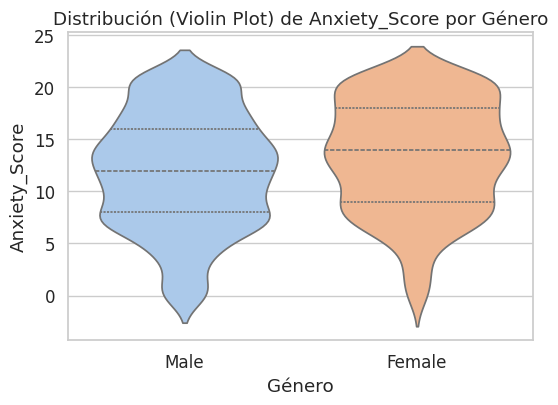

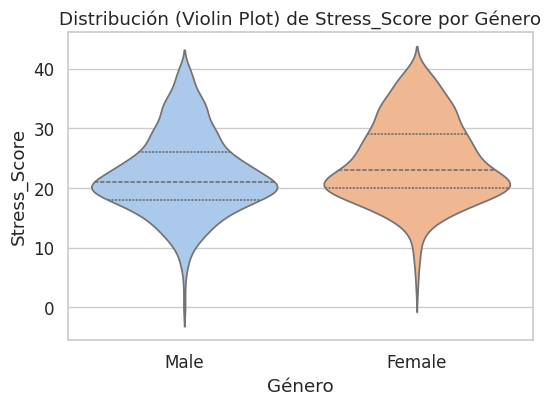

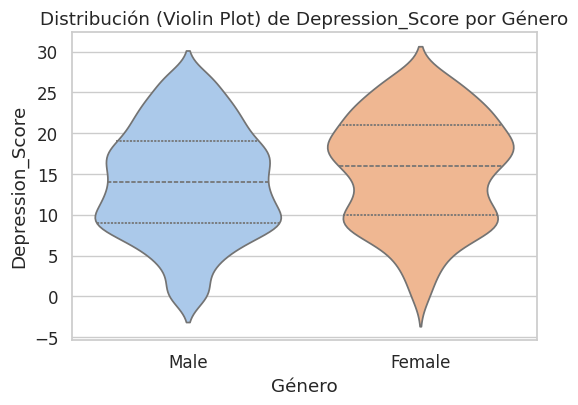

In [48]:
# Filtrar solo los géneros Male y Female
df_gender = df[df['Gender'].isin(['Male', 'Female'])]

variables = ['Anxiety_Score', 'Stress_Score', 'Depression_Score']


for var in variables:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Gender', y=var, data=df_gender,
                   palette='pastel', inner='quartile',
                   order=['Male', 'Female'])  # Para asegurar el orden
    plt.title(f'Distribución (Violin Plot) de {var} por Género')
    plt.xlabel('Género')
    plt.ylabel(var)
    plt.show()

Estos gráficos permiten visualizar la dispersión y concentración de los datos, facilitando la comparación entre hombres y mujeres.</br>

- Ansiedad
La distribución de los puntajes de ansiedad es similar entre hombres y mujeres, con una mediana cercana al valor medio de la escala.  
Se observa una ligera mayor concentración de mujeres con puntajes más altos, lo que sugiere una tendencia a niveles de ansiedad algo mayores en comparación con los hombres.</br>

- Estrés
En el caso del estrés, las distribuciones de hombres y mujeres son muy similares, con medianas cercanas y una amplitud comparable.  
No se observan diferencias marcadas, aunque las mujeres presentan una ligera tendencia a valores medios un poco más altos, lo que podría indicar niveles de estrés levemente superiores en promedio.</br>

- Depresión
En la distribución de los puntajes de depresión se observa que las mujeres presentan una mediana ligeramente más alta y una mayor concentración en valores elevados. En contraste, los hombres tienden a mostrar puntajes algo más bajos en promedio. Esto sugiere que los niveles de depresión son, en general, más altos entre las mujeres dentro de esta muestra.


##**Hipótesis 3: Diferencias en salud mental según el año académico**
Los boxplots mostraron ligeras variaciones entre los grupos, especialmente entre estudiantes de primer y último año.

H₀: No hay diferencias significativas en los niveles de ansiedad, estrés y depresión entre los años académicos.

H₁: Los niveles de ansiedad, estrés y depresión varían significativamente entre los distintos años académicos.

**Prueba estadística:** Kruskal-Wallis.

**Tipo de variables:**

Variable dependiente: Anxiety_Score, Depression_Score y Stress_Score.

Variable independiente: Academic_Year



In [49]:

#Variables a analizar
variables = ['Anxiety_Score', 'Stress_Score', 'Depression_Score']
print("Pruebas de normalidad y comparación entre años académicos\n")
for var in variables:
    print(f"\nVariable: {var}")

    #Verificación de normalidad (Shapiro-Wilk)
    normalidad = {}
    for year in df['Academic_Year'].unique():
        grupo = df[df['Academic_Year'] == year][var].dropna()
        if len(grupo) > 3:  # Shapiro necesita mínimo 3 valores
            stat, p = shapiro(grupo)
            normalidad[year] = p
            print(f"  {year}: p = {p}")
        else:
            print(f"  {year}: grupo demasiado pequeño para probar normalidad")

    #Verificar si todos los grupos son normales
    normales = all(p > 0.05 for p in normalidad.values())

    if normales:
        print("Todos los grupos presentan distribución normal")

        #Homogeneidad de varianzas
        grupos = [df[df['Academic_Year'] == year][var].dropna() for year in df['Academic_Year'].unique()]
        stat_lev, p_lev = levene(*grupos)
        print(f"  Prueba de Levene p = {p_lev}")

        if p_lev > 0.05:
            print("Varianzas homogéneas → aplicar ANOVA")
            stat, p = f_oneway(*grupos)
            prueba = "ANOVA (paramétrica)"
        else:
            print("Varianzas no homogéneas → aplicar prueba no paramétrica Kruskal-Wallis")
            stat, p = kruskal(*grupos)
            prueba = "Kruskal-Wallis (no paramétrica por varianzas distintas)"
    else:
        print("No hay normalidad → aplicar prueba no paramétrica Kruskal-Wallis")
        grupos = [df[df['Academic_Year'] == year][var].dropna() for year in df['Academic_Year'].unique()]
        stat, p = kruskal(*grupos)
        prueba = "Kruskal-Wallis (no paramétrica por falta de normalidad)"

    #Resultados finales
    print(f"\n{prueba}")
    print(f"   Estadístico = {stat}, p = {p}")
    if p < 0.05:
        print("Se rechaza H₀ → Existen diferencias significativas entre años académicos\n")
    else:
        print("No se rechaza H₀ → No hay diferencias significativas entre años académicos\n")
    print("-" * 70)

Pruebas de normalidad y comparación entre años académicos


Variable: Anxiety_Score
  4th Year: p = 3.267764288253403e-07
  1st Year: p = 9.626602722887235e-09
  3rd Year: p = 6.880266431293694e-11
  2nd Year: p = 2.2921890128679425e-08
  Other: p = 0.01002593702237243
No hay normalidad → aplicar prueba no paramétrica Kruskal-Wallis

Kruskal-Wallis (no paramétrica por falta de normalidad)
   Estadístico = 32.83839632146287, p = 1.2890239934527319e-06
Se rechaza H₀ → Existen diferencias significativas entre años académicos

----------------------------------------------------------------------

Variable: Stress_Score
  4th Year: p = 3.39182819558827e-06
  1st Year: p = 9.659072894459333e-08
  3rd Year: p = 3.117471543256787e-09
  2nd Year: p = 0.0014849428529888832
  Other: p = 0.04468898630603657
No hay normalidad → aplicar prueba no paramétrica Kruskal-Wallis

Kruskal-Wallis (no paramétrica por falta de normalidad)
   Estadístico = 20.499340729199062, p = 0.00039789136694828425
Se rec

**Selección de prueba adecuada:**  

La prueba de normalidad de Shapiro–Wilk mostró valores de p < 0.05 en todos los grupos de año académico y para las tres variables analizadas (ansiedad, estrés y depresión), lo que indica que ninguna de ellas sigue una distribución normal. Debido a que el supuesto de normalidad no se cumple y el número de grupos a comparar es superior a dos, se optó por utilizar la prueba no paramétrica de Kruskal–Wallis, la cual es adecuada para contrastar diferencias entre más de dos grupos independientes cuando los datos no presentan una distribución normal o las varianzas no son homogéneas.

**Interpretación:**

Los resultados de la prueba de Kruskal-Wallis mostraron valores de p < 0.05 en las tres variables, lo que lleva a rechazar la hipótesis nula y concluir que existen diferencias estadísticamente significativas en los niveles de ansiedad, estrés y depresión entre los distintos años académicos. Esto sugiere que el año de estudio influye de manera significativa en el estado emocional de los estudiantes universitarios, posiblemente asociado a factores como la carga académica, la adaptación universitaria o la cercanía a la graduación.

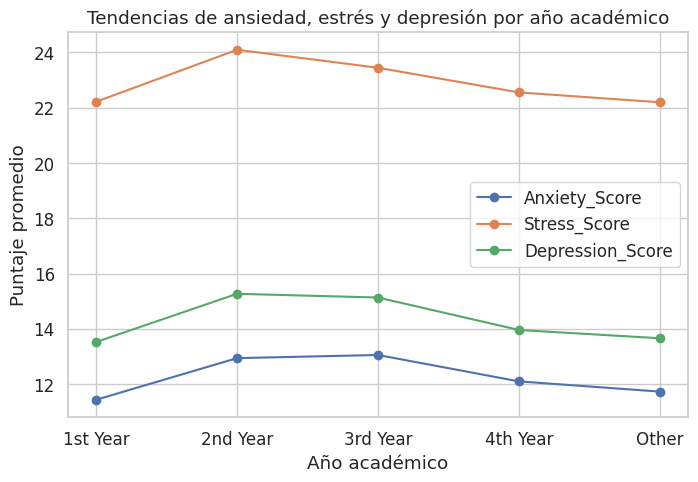

In [50]:
means = df.groupby('Academic_Year')[['Anxiety_Score', 'Stress_Score', 'Depression_Score']].mean().reset_index()

plt.figure(figsize=(8,5))
for col in ['Anxiety_Score', 'Stress_Score', 'Depression_Score']:
    plt.plot(means['Academic_Year'], means[col], marker='o', label=col)

plt.title('Tendencias de ansiedad, estrés y depresión por año académico')
plt.xlabel('Año académico')
plt.ylabel('Puntaje promedio')
plt.legend()
plt.show()

Los niveles promedio de ansiedad, estrés y depresión varían significativamente entre los años académicos.
Se observan puntajes más altos en los primeros años, especialmente en segundo año, y una tendencia a disminuir en los años posteriores.
Estos resultados, confirmados por la prueba de Kruskal-Wallis, indican que el año académico influye en el bienestar psicológico de los estudiantes.

##**Hipótesis 4: Influencia del tipo de universidad en los niveles de salud mental**</br>
Algunas instituciones mostraron medianas más altas en los indicadores psicológicos; esto podría deberse a diferencias en exigencia académica, servicios de apoyo o condiciones socioeconómicas de la población estudiantil.</br>
H₀: El tipo de universidad (pública o privada) no influye significativamente en los niveles de ansiedad, estrés y depresión..</br>
H₁: El tipo de universidad (pública o privada) sí influye significativamente en los niveles de ansiedad, estrés y depresión.</br>

**Prueba estadística:** t de Student (paramétrica) y
Mann-Whitney U (no paramétrica)

**Tipo de variables:**

Dependiente: Stress_Score, Anxiety_Score, Depression_Score

Independiente: University_type




In [51]:
#Diccionario de mapeo (IUT ahora como Public)
mapping = {
    "IUB": "Private", "AIUB": "Private", "IUT": "Public",
    "DU": "Public", "DUET": "Public", "NSU": "Private",
    "PSTU": "Public", "BUET": "Public", "EWU": "Private",
    "RUET": "Public", "RU": "Public", "BAU": "Public",
    "BRAC": "Private", "Daffodil": "Private", "UIU": "Private"}

#Aplicar mapeo
df['university_type'] = df['University'].map(mapping)

#Filtrar solo Public y Private
df_two = df[df['university_type'].isin(['Public', 'Private'])].copy()

#Pruebas
variables = ['Anxiety_Score', 'Stress_Score', 'Depression_Score']

for var in variables:
    print(f"\nVariable: {var}")
    grupo_pub = df_two[df_two['university_type'] == 'Public'][var].dropna()
    grupo_pri = df_two[df_two['university_type'] == 'Private'][var].dropna()

    n_pub, n_pri = len(grupo_pub), len(grupo_pri)
    print(f"Tamaños: Public = {n_pub}, Private = {n_pri}")

    #Normalidad
    p_pub = p_pri = np.nan
    if n_pub >= 3:
        _, p_pub = shapiro(grupo_pub)
        print(f"Shapiro-Wilk Public: p = {p_pub}")
    if n_pri >= 3:
        _, p_pri = shapiro(grupo_pri)
        print(f"Shapiro-Wilk Private: p = {p_pri}")

    normales = (not np.isnan(p_pub) and not np.isnan(p_pri) and p_pub > 0.05 and p_pri > 0.05)

    #Homogeneidad de varianzas
    _, p_lev = levene(grupo_pub, grupo_pri)
    print(f"Prueba de Levene (homogeneidad): p = {p_lev}")

    #Selección del método
    if normales or (n_pub > 30 and n_pri > 30): #Invocando el Teorema del Limite central muestras mayor a 30
        #Aplicar t de Student o Welch según varianzas
        if p_lev > 0.05:
            stat_t, p_t = ttest_ind(grupo_pub, grupo_pri, equal_var=True)
            metodo_t = "T de Student (varianzas iguales)"
        else:
            stat_t, p_t = ttest_ind(grupo_pub, grupo_pri, equal_var=False)
            metodo_t = "T de Welch (varianzas distintas)"

        print(f"\n{metodo_t}")
        print(f"Estadístico t = {stat_t}, p = {p_t}")
        if p_t < 0.05:
            print("Se rechaza H₀ → Existen diferencias significativas entre universidades.")
        else:
            print("No se rechaza H₀ → No hay diferencias significativas entre universidades.")

    else:
        print("\nNo hay normalidad ni tamaño muestral suficiente → se recomienda prueba no paramétrica.")

    # Aplicar siempre Mann–Whitney como comparación
    stat_u, p_u = mannwhitneyu(grupo_pub, grupo_pri, alternative='two-sided')
    print(f"\nPrueba U de Mann–Whitney (no paramétrica)")
    print(f"Estadístico U = {stat_u}, p = {p_u}")
    if p_u < 0.05:
        print("Se rechaza H₀ → Existen diferencias significativas entre universidades.")
    else:
        print("No se rechaza H₀ → No hay diferencias significativas entre universidades.")

    print("\n" + "-"*70)


Variable: Anxiety_Score
Tamaños: Public = 743, Private = 1222
Shapiro-Wilk Public: p = 8.329361758605715e-13
Shapiro-Wilk Private: p = 1.1352707216235949e-14
Prueba de Levene (homogeneidad): p = 0.2818538426361715

T de Student (varianzas iguales)
Estadístico t = 2.3344164588624405, p = 0.019674311807345864
Se rechaza H₀ → Existen diferencias significativas entre universidades.

Prueba U de Mann–Whitney (no paramétrica)
Estadístico U = 480940.0, p = 0.026769447298467114
Se rechaza H₀ → Existen diferencias significativas entre universidades.

----------------------------------------------------------------------

Variable: Stress_Score
Tamaños: Public = 743, Private = 1222
Shapiro-Wilk Public: p = 6.191356656297461e-08
Shapiro-Wilk Private: p = 2.554057374533e-12
Prueba de Levene (homogeneidad): p = 3.996447693487299e-18

T de Welch (varianzas distintas)
Estadístico t = 7.226365508761196, p = 8.40796371362042e-13
Se rechaza H₀ → Existen diferencias significativas entre universidades.



**Selección de prueba adecuada:** </br>
Se creó la variable categórica university_type (Public / Private) a partir de los nombres de las universidades. Dado que esa variable es independiente y está compuesta por dos grupos (pública y privada), se optó por emplear pruebas diseñadas para comparar medias entre dos muestras independientes. Inicialmente, se evaluó el supuesto de normalidad mediante la prueba de Shapiro–Wilk, cuyos resultados mostraron valores p < 0.05 en todos los casos, lo que indica que las distribuciones no se ajustan a una normal. Sin embargo, debido al gran tamaño muestral en ambos grupos (pública = 743, privada = 1222), se consideró aplicable el Teorema del Límite Central (TLC), que permite el uso de pruebas basadas en medias aun con datos no normales, siempre que las muestras sean suficientemente grandes.

Posteriormente, se evaluó la homogeneidad de varianzas mediante la prueba de Levene. Los resultados indicaron varianzas homogéneas para Anxiety_Score y Depression_Score (p > 0.05), por lo que se aplicó la t de Student para muestras independientes; en cambio, para Stress_Score (p < 0.05), se empleó la t de Welch, que corrige la desigualdad de varianzas entre grupos.

Finalmente, para reforzar la robustez del análisis ante la falta de normalidad, se aplicó la prueba U de Mann–Whitney, una alternativa no paramétrica adecuada para comparar dos grupos independientes sin asumir distribución normal.

**Interpretación**</br>
Los resultados sugieren que, los niveles de ansiedad y estrés difieren significativamente entre estudiantes de universidades públicas y privadas, lo que podría relacionarse con factores institucionales como el nivel de exigencia académica o el acceso a recursos de apoyo psicológico.
En cambio, los niveles de depresión no mostraron diferencias estadísticamente significativas entre ambos tipos de instituciones.

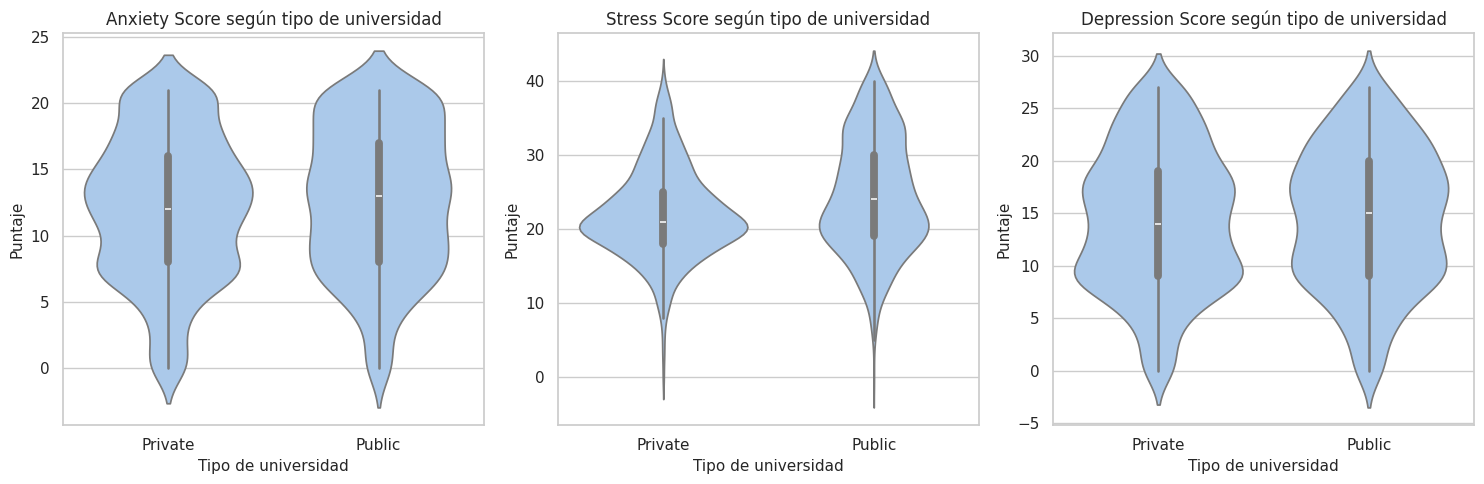

In [52]:
# Ajustar estilo visual
sns.set(style="whitegrid", palette="pastel")

# Variables a analizar
variables = ['Anxiety_Score', 'Stress_Score', 'Depression_Score']

# Crear figura
plt.figure(figsize=(15, 5))

for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(
        data=df,
        x="university_type",
        y=var,
        inner="box",  # muestra la mediana y el rango intercuartílico
        width=0.8
    )
    plt.title(f"{var.replace('_', ' ')} según tipo de universidad", fontsize=12)
    plt.xlabel("Tipo de universidad", fontsize=11)
    plt.ylabel("Puntaje", fontsize=11)

plt.tight_layout()
plt.show()

Los siguientes violin plots muestran la distribución de los puntajes de ansiedad, estrés y depresión según el tipo de universidad (pública o privada):</br>
**Ansiedad (Anxiety Score):**
Se observa una ligera diferencia entre los grupos: los estudiantes de universidades públicas tienden a presentar niveles de ansiedad ligeramente mayores que los de universidades privadas. Aunque la forma general de las distribuciones es similar, la prueba Mann-Whitney U confirma que esta diferencia es estadísticamente significativa, lo que indica que el tipo de universidad podría influir en los niveles de ansiedad.</br>
**Estrés (Stress Score):**
En este caso, la diferencia visual es más evidente. Los estudiantes de universidades públicas muestran una concentración de valores más altos, indicando una mayor presencia de estrés. Este patrón coincide con los resultados de la prueba Mann-Whitney U, que evidencian diferencias significativas en los niveles de estrés según el tipo de universidad.</br>
**Depresión (Depression Score):**
A diferencia de las variables anteriores, las distribuciones de depresión son bastante similares entre universidades públicas y privadas. Esto coincide con los resultados estadísticos, donde no se encontraron diferencias significativas, sugiriendo que el tipo de institución no se asocia con cambios relevantes en los niveles de depresión.</br>
En conclusión, los gráficos respaldan la evidencia de que los niveles de ansiedad y estrés son significativamente mayores en estudiantes de universidades públicas. En cambio, los niveles de depresión no muestran diferencias relevantes entre los dos tipos de instituciones.
Visualmente, los violin plots permiten apreciar la dispersión y la concentración de los puntajes, apoyando la interpretación de los resultados inferenciales.

## **Hipótesis 5: Diferencias en salud mental según la obtención de beca**
Se compararon los grupos de estudiantes con (Yes) y sin (No) beca en las variables Anxiety_Score, Stress_Score y Depression_Score.</br>
H₀: No hay diferencias significativas en los niveles de ansiedad, estrés y depresión entre estudiantes con y sin beca.   </br>
H₁: Los estudiantes que reciben beca presentan niveles diferentes de ansiedad, estrés y depresión en comparación con quienes no la reciben.</br>

**Prueba estadística:** t de Student (paramétrica) y
Mann-Whitney U (no paramétrica)

**Tipo de variables:**

Dependiente: Depression_Score, Anxiety_Score y Stress_Score

Independiente: Scholarship </br>
Esta comparación permite explorar si el hecho de recibir beca se asocia con niveles distintos de ansiedad, estrés o depresión.

In [53]:
# Hipótesis 5: Diferencias por beca (Yes / No)
variables = ["Anxiety_Score", "Stress_Score", "Depression_Score"]

for var in variables:
    print(f"\nVariable: {var}")
    grupo_yes = df[df["Scholarship"] == "Yes"][var].dropna()
    grupo_no = df[df["Scholarship"] == "No"][var].dropna()

    print(f"Tamaños: Yes = {len(grupo_yes)}, No = {len(grupo_no)}")

    #Prueba de normalidad (Shapiro-Wilk) ---
    p_yes = shapiro(grupo_yes).pvalue if len(grupo_yes) > 3 else np.nan
    p_no = shapiro(grupo_no).pvalue if len(grupo_no) > 3 else np.nan
    print(f"Shapiro Yes: p = {p_yes}")
    print(f"Shapiro No: p = {p_no}")

    normales = (p_yes > 0.05 and p_no > 0.05)

    #Evaluación de varianzas
    _, p_lev = levene(grupo_yes, grupo_no)
    print(f"Levene (homogeneidad de varianzas): p = {p_lev:.4e}")

    #Selección de prueba según supuestos
    if normales or (len(grupo_yes) > 30 and len(grupo_no) > 30):  # aplica TLC
        if p_lev > 0.05:
            stat_t, p_t = ttest_ind(grupo_yes, grupo_no, equal_var=True)
            metodo = "T de Student (varianzas iguales)"
        else:
            stat_t, p_t = ttest_ind(grupo_yes, grupo_no, equal_var=False)
            metodo = "T de Welch (varianzas distintas)"
        print(f"\n{metodo}")
        print(f"Estadístico t = {stat_t:.4f}, p = {p_t:.4e}")
        if p_t < 0.05:
            print("Se rechaza H₀: existen diferencias significativas entre estudiantes con y sin beca.")
        else:
            print("No se rechaza H₀: no hay evidencia de diferencias significativas.")
    else:
        print("\nNo hay normalidad → aplicar prueba no paramétrica Mann–Whitney.")

    #Prueba no paramétrica (complementaria siempre)
    stat_u, p_u = mannwhitneyu(grupo_yes, grupo_no, alternative="two-sided")
    print(f"\nMann–Whitney U = {stat_u:.4f}, p = {p_u:}")
    if p_u < 0.05:
        print("Se rechaza H₀: existen diferencias significativas entre estudiantes con y sin beca.")
    else:
        print("No se rechaza H₀: no hay evidencia de diferencias significativas.")

    print("-" * 70)


Variable: Anxiety_Score
Tamaños: Yes = 405, No = 1560
Shapiro Yes: p = 1.3062159823133435e-08
Shapiro No: p = 1.392638381001266e-17
Levene (homogeneidad de varianzas): p = 8.0072e-01

T de Student (varianzas iguales)
Estadístico t = 0.4383, p = 6.6125e-01
No se rechaza H₀: no hay evidencia de diferencias significativas.

Mann–Whitney U = 323679.0000, p = 0.4437501470411934
No se rechaza H₀: no hay evidencia de diferencias significativas.
----------------------------------------------------------------------

Variable: Stress_Score
Tamaños: Yes = 405, No = 1560
Shapiro Yes: p = 5.07940024920528e-05
Shapiro No: p = 2.2084232079814546e-14
Levene (homogeneidad de varianzas): p = 3.9738e-01

T de Student (varianzas iguales)
Estadístico t = -0.7252, p = 4.6843e-01
No se rechaza H₀: no hay evidencia de diferencias significativas.

Mann–Whitney U = 312145.5000, p = 0.7117409794993415
No se rechaza H₀: no hay evidencia de diferencias significativas.
--------------------------------------------

**Selección de prueba adecuada:**</br>
Dado que la variable independiente Scholarship está conformada por dos grupos independientes (“Yes” y “No”) y las variables dependientes (Anxiety_Score, Stress_Score y Depression_Score) son cuantitativas continuas, se consideró pertinente utilizar pruebas diseñadas para comparar medias entre dos grupos. En primer lugar, se evaluaron los supuestos de normalidad y homogeneidad de varianzas para determinar la prueba más adecuada. La prueba de Shapiro–Wilk mostró valores p < 0.05 en todos los casos, indicando que las distribuciones no se ajustan a la normalidad. No obstante, dado que ambos grupos presentan tamaños muestrales amplios (Yes = 405, No = 1560), se invocó el Teorema del Límite Central (TLC), que permite asumir la aproximación a la normalidad en la distribución de las medias.

Posteriormente, la prueba de Levene confirmó la homogeneidad de varianzas en las tres variables (p > 0.05), lo que permitió aplicar la prueba t de Student para muestras independientes. Sin embargo, considerando la falta de normalidad en las distribuciones originales, se aplicó adicionalmente la prueba no paramétrica U de Mann–Whitney, con el fin de validar la consistencia de los resultados bajo un enfoque robusto.

**Interpretación**</br>
Tanto la t de Student como la prueba de Mann–Whitney en todos los casos, conincidieron en que los valores de *p* fueron mayores a 0.05, indicando que no se encontraron diferencias significativas en los niveles de ansiedad, estrés ni depresión entre los estudiantes con beca y aquellos sin ella. Esto sugiere que el hecho de recibir una beca no influye de manera significativa en el bienestar psicológico, al menos dentro de esta muestra.


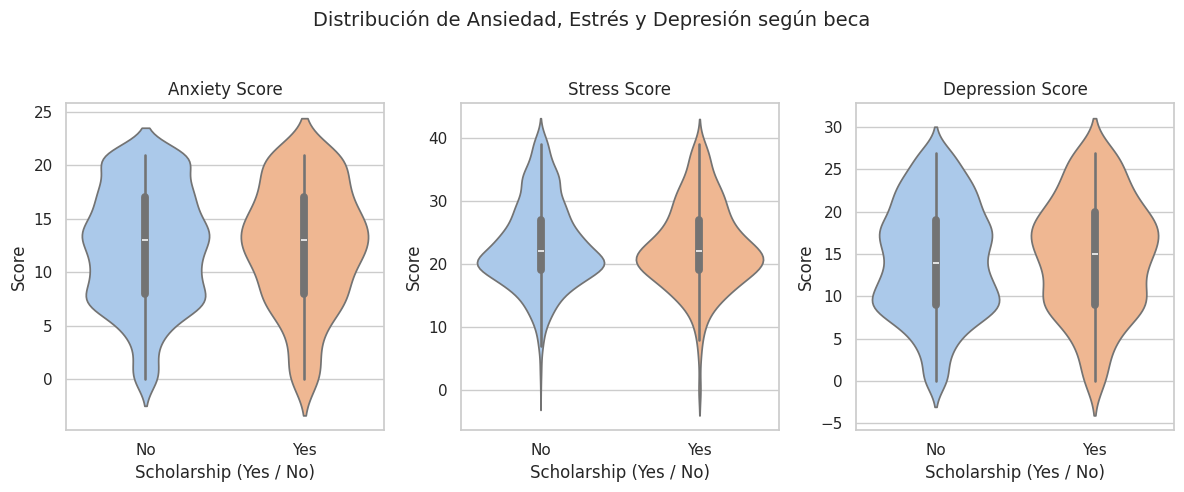

In [54]:
variables = ['Anxiety_Score', 'Stress_Score', 'Depression_Score']
plt.figure(figsize=(12, 5))

for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x='Scholarship', y=var, data=df, palette='pastel', inner='box')
    plt.title(var.replace('_', ' '))
    plt.xlabel('Scholarship (Yes / No)')
    plt.ylabel('Score')

plt.suptitle('Distribución de Ansiedad, Estrés y Depresión según beca', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Las distribuciones de ansiedad, estrés y depresión son muy similares entre los estudiantes que tienen beca y los que no la tienen.  
Las medianas y la dispersión de los puntajes apenas muestran diferencias visibles, lo cual refuerza los resultados de la prueba U de Mann–Whitney, que no encontró diferencias estadísticamente significativas.  
Esto sugiere que el hecho de recibir una beca no tiene un efecto notable sobre los niveles de bienestar psicológico en esta muestra.

#**CONCLUSIONES**

El estudio permitió obtener una visión integral sobre los niveles de ansiedad, estrés y depresión en estudiantes universitarios de Banglaseh, asi como su relación con factores académicos y demográficos.

Los resultados del análisis exploratorio evidenciaron una alta prevalencia de malestar emocional en la población estudiada. Los niveles de ansiedad y estrés se concentraron principalmente en rangos moderados y severos, mientras que la depresión mostró una mayor proporción de casos leves a moderados, aunque con presencia notable de síntomas severos. Esto refleja que la mayoría de los estudiantes universitarios enfrentan un grado significativo de afectación psicológica durante su vida universitaria.

En cuanto a los factores asociados, se realizaron pruebas de hipótesis considerando supuestos de normalidad, homogeneridad de varianzas y el Teorema del Límite Central (TLC), lo que permitió combinar pruebas paramétricas (t de Student, t de Welch) y no paramétricas (Mann-Whitney, Kruskal-Wallis y Spearman) de acuerdo con la naturaleza de los datos y la estructura de cada hipótesis.

**Relación entre ansiedad, estrés y depresión**
Los resultados del mapa de calor y la prueba de correlación de Spearman mostraron asociaciones positivas y estadísticamente significativas entre las variables la relación más fuerte se presentó entre ansiedad y depresión (ρ = 0.77), seguida por ansiedad y estrés (ρ = 0.64) y estrés y depresión (ρ = 0.58). Esto confirma que estos estados emocionales están estrechamente interconectados, reflejando una base común de malestar psicológico en los estudiantes.

**Género:** Las mujeres presentaron medianas más altas en asiedad, estrés y depresión en comparación con los hombres. Este patrón fue confirmado mediante la prueba de hipótesis. Si bien las distribuciones no fueron normales, el TLC permitió aplicar la prueba t de Student, corroborada con la U de Mann-Whitney, se obtuvo resultados coincidentes, mostraron diferencias significativas entre géneros, sugiriendo que el factor género influye en la manifestación emocional.

**Edad:** El grupo de adultos mayores de 30 años reportó un nivel alto de ansiedad, el grupo de jovenes de 18-30 presentan niveles altos a moderados, esto sugiere que la ansiedad tiende a incrementarse con la edad, relacionado a mayores responsabilidades.

**Año académico:** Los resultados del EDA y la prueba de hipótesis Kruskal-Wallis indicaron diferencias significativas entre los años de estudio. Los estudiantes de segundo y tercer año presentaron mayores niveles de ansiedad, depresión y estrés, lo que podría estar asociado a la carga académica y a procesos de adptación al entorno.</br>

**Universidad:** Se observaron diferencias notables en el EDA entre instituciones. La Islamic University of Technology (IUT) presentó los niveles más altos en los tres indicadores de salud mental, mientras que DUET registró los más bajos. Tras verificar los supuestos, se aplicaron las pruebas t de Student, t de Welch y Mann-Whitney, según correspondía. Los resultados mostraron diferencias significativas en ansiedad y estrés, pero no en depresión, entre los estudiantes de universidades públicas y privadas. Esto sugiere que el contexto institucional puede influir en los niveles de tensión emocional, posiblemente asociado a la exigencia académica o la disponibilidad de recursos de apoyo psicológico.</br>

**Departamento académico:** Los estudiantes de áreas de ingeniería, especialmente Civil y EEE/ECA, presentaron mayores niveles de ansiedad y estrés, posiblemente debido a la alta exigencia y carga académica de estos programas. En contraste, los estudiantes de Computing y Life Sciences mostraron niveles más moderados.</br>

**Becas:** Tanto el análisis gráfico como las pruebas de hipótesis evidenciaron resultados consistentes. Aunque las distribuciones no fueron normales, el gran tamaño muestral permitió invocar el TLC y aplicar la t de Student, complementada con la U de Mann-Whitney para confirmar los resultados. En ambos casos, no se encontraron diferencias significativas entre los estudiantes con y sin beca, lo que sugiere que el hecho de recibir o no apoyo económico no influye de manera relevante en los niveles de ansiedad, estrés o depresión dentro de esta muestra.

En conjunto, el análisis permite concluir que las variables como el género, el año académico y el tipo de universidad influyen significativamente en los niveles de ansiedad, estrés y depresión, mientras que la obtención de becas no presenta un efecto estadísticamente relevante. Estos resultados evidencian que la salud mental de los estudiantes universitarios de Bangladesh constituye un aspecto crítico, influenciado por factores personales, académicos e institucionales. La alta prevalencia de síntomas de ansiedad, estrés y depresión, junto con las diferencias encontradas entre grupos, resalta la necesidad de implementar estrategias de apoyo psicológico y programas preventivos en el ámbito universitario. Asimismo, se recomienda profundizar en estudios posteriores que analicen el impacto de variables adicionales, como la carga académica, las condiciones socioeconómicas y el entorno familiar, con el fin de comprender de manera más integral las causas y consecuencias del malestar emocional en los jóvenes universitarios.





